# Scraping

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# !pip install google-play-scraper

In [ ]:
# from google_play_scraper import app

import pandas as pd

import numpy as np

Mengambil data ulasan semua dari app.bpjs.mobile (aplikasi mobile jkn)

In [ ]:
# from google_play_scraper import Sort, reviews_all

# result = reviews_all(
#     'app.bpjs.mobile',
#     sleep_milliseconds=0,
#     lang='id',
#     country='id',
#     sort=Sort.NEWEST,
# )

## **Filter berdasarkan tahun, tahun yang digunakan adalah mulai dari 1 Januari 2024 - 5 Oktober 2024**

In [ ]:
# from datetime import datetime

# start_date = datetime(2024, 1, 1)
# end_date = datetime(2024, 10, 5)

# filtered_reviews = [
#     review for review in result
#     if start_date <= review['at'] <= end_date
# ]

# **Cetak tabel untuk ditampilkan beberapa data**

In [ ]:
# df_jkn = pd.DataFrame(np.array(filtered_reviews), columns=['review'])
# df_jkn = df_jkn.join(pd.DataFrame(df_jkn.pop('review').tolist()))

# df_jkn.head()

In [ ]:
# google_users_count = (df_jkn['userName'] == "Pengguna Google").sum()
# real_users_count = len(df_jkn) - google_users_count

# print(f"Jumlah Pengguna Google: {google_users_count}")
# print(f"Jumlah Pengguna dengan Nama Asli: {real_users_count}")

## **Cek jumlah data yang sudah discrapping**

In [ ]:
# len(df_jkn.index)

## **Menyerderhanakan tabel dengan header yang akan tampil**

In [ ]:
# df_jkn[['userName', 'score','at', 'content']].head()

In [ ]:
# new_df = df_jkn[['userName', 'score','at', 'content']]
# sorted_df = new_df.sort_values(by='at', ascending=False)
# sorted_df.head()

In [ ]:
# my_df = sorted_df[['userName', 'score','at', 'content']]
# my_df.head()

In [ ]:
# my_df.to_csv('/content/drive/MyDrive/load_model/Hasil Scrapping (1).csv', index=False, encoding='utf-8')
# print("Data berhasil disimpan ke 'Hasil Scrapping.csv'")

**Preprocessing**

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/load_model/Hasil Scrapping (1).csv")
data.head(5)

,userName,score,at,content
0,Pengguna Google,5,2024-10-04 23:54:43,Bagus
1,Pengguna Google,4,2024-10-04 23:25:43,mantap
2,Pengguna Google,4,2024-10-04 23:25:07,Bagus
3,Pengguna Google,5,2024-10-04 23:14:52,Sangat membantu
4,Pengguna Google,5,2024-10-04 22:44:49,Bagus bisa untuk cek kesehatan


In [ ]:
df_preprocessing = data
df_preprocessing.drop_duplicates(subset = "content", keep = 'first', inplace = True)
df_preprocessing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30926 entries, 0 to 44751
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   userName  30926 non-null  object
 1   score     30926 non-null  int64 
 2   at        30926 non-null  object
 3   content   30926 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.2+ MB


In [ ]:
len(df_preprocessing.index)

30926

## 1. Cleaning

In [ ]:
import re
import string
import nltk

df = pd.DataFrame(df_preprocessing)
def remove_numbers(reviews_all):
  if reviews_all is not None and isinstance(reviews_all, str):
    reviews_all = re.sub(r'\d+', '', reviews_all)
  return reviews_all

def remove_symbols(reviews_all):
  if reviews_all is not None and isinstance(reviews_all, str):
    reviews_all = re.sub(r'[^a-zA-Z0-9\s]', '', reviews_all)
  return reviews_all

def remove_whitespace(reviews_all):
  if reviews_all is not None and isinstance(reviews_all, str):
    reviews_all = reviews_all.strip()
  return reviews_all

def remove_punctuation(reviews_all):
  if reviews_all is not None and isinstance(reviews_all, str):
    # reviews_all = reviews_all.translate(str.maketrans('', '', string.punctuation))
    reviews_all = re.sub(r'[^\w\s]', ' ', reviews_all)  # Mengganti tanda baca dengan spasi
  return reviews_all

def remove_emoticons(reviews_all):
  if reviews_all is not None and isinstance(reviews_all, str):
    reviews_all = re.sub(r'[^\x00-\x7F]+', '', reviews_all)
  return reviews_all

df['cleaning'] = df['content'].apply(lambda x: remove_numbers(x))
df['cleaning'] = df['cleaning'].apply(lambda x: remove_symbols(x))
df['cleaning'] = df['cleaning'].apply(lambda x: remove_whitespace(x))
df['cleaning'] = df['cleaning'].apply(lambda x: remove_punctuation(x))
df['cleaning'] = df['cleaning'].apply(lambda x: remove_emoticons(x))
df.head(10)

,userName,score,at,content,cleaning
0,Pengguna Google,5,2024-10-04 23:54:43,Bagus,Bagus
1,Pengguna Google,4,2024-10-04 23:25:43,mantap,mantap
3,Pengguna Google,5,2024-10-04 23:14:52,Sangat membantu,Sangat membantu
4,Pengguna Google,5,2024-10-04 22:44:49,Bagus bisa untuk cek kesehatan,Bagus bisa untuk cek kesehatan
5,Pengguna Google,5,2024-10-04 22:34:44,"Udah keren sih , cuma tambah informasi sumber ...",Udah keren sih cuma tambah informasi sumber r...
6,Pengguna Google,5,2024-10-04 22:33:23,alhamdulillah,alhamdulillah
7,Pengguna Google,1,2024-10-04 22:28:32,aplikasi sampah ngntd. verifikasi cuman bisa l...,aplikasi sampah ngntd verifikasi cuman bisa le...
8,Pengguna Google,5,2024-10-04 22:22:49,Baik,Baik
9,Pengguna Google,5,2024-10-04 22:09:38,"Sangat membantu untuk mengetahui antrian, dan ...",Sangat membantu untuk mengetahui antrian dan d...
10,Pengguna Google,5,2024-10-04 22:04:57,Sangat baik dan sangat terbantu,Sangat baik dan sangat terbantu


In [ ]:
df.to_csv('/content/drive/MyDrive/load_model/Cleaning', index=False, encoding='utf-8')
print("Data berhasil disimpan ke 'Cleaning.csv'")

Data berhasil disimpan ke 'Cleaning.csv'


## 2. Case Folding

In [ ]:
def case_folding(text):
    if isinstance(text, str):
        return text.lower()
    else:
        return text

df['case_folding'] = df['cleaning'].apply(case_folding)
print(df.head())

          userName  score                   at  \
0  Pengguna Google      5  2024-10-04 23:54:43   
1  Pengguna Google      4  2024-10-04 23:25:43   
3  Pengguna Google      5  2024-10-04 23:14:52   
4  Pengguna Google      5  2024-10-04 22:44:49   
5  Pengguna Google      5  2024-10-04 22:34:44   

                                             content  \
0                                              Bagus   
1                                             mantap   
3                                    Sangat membantu   
4                     Bagus bisa untuk cek kesehatan   
5  Udah keren sih , cuma tambah informasi sumber ...   

                                            cleaning  \
0                                              Bagus   
1                                             mantap   
3                                    Sangat membantu   
4                     Bagus bisa untuk cek kesehatan   
5  Udah keren sih  cuma tambah informasi sumber r...   

                         

In [ ]:
df.to_csv('/content/drive/MyDrive/load_model/Casefolding.csv', index=False, encoding='utf-8')
print("Data berhasil disimpan ke 'Casefolding.csv'")

Data berhasil disimpan ke 'Casefolding.csv'


Penggantian Kata Baku

In [ ]:
def replace_taboo_words(text, kamus_tidak_baku):
    if isinstance(text, str):
        words = text.split()
        replaced_words = []
        kalimat_baku = []
        kata_diganti = []
        kata_tidak_baku_hash = []

        for word in words:
            if word in kamus_tidak_baku:
                baku_word = kamus_tidak_baku[word]
                if isinstance(baku_word, str) and all(char.isalpha() or char.isspace() for char in baku_word):
                    replaced_words.append(baku_word)
                    kalimat_baku.append(baku_word)
                    kata_diganti.append(word)
                    kata_tidak_baku_hash.append(hash(word))
                else:
                    replaced_words.append(word)
            else:
                replaced_words.append(word)

        replaced_text = ' '.join(replaced_words)
    else:
        replaced_text = ''
        kalimat_baku = []
        kata_diganti = []
        kata_tidak_baku_hash = []

    return replaced_text, kalimat_baku, kata_diganti, kata_tidak_baku_hash

In [ ]:
kamus_data = pd.read_excel('/content/drive/MyDrive/load_model/kamuskatabaku(2).xlsx')
kamus_tidak_baku = dict(zip(kamus_data['tidak_baku'], kamus_data['kata_baku'], ))

## 3. Normalisasi

In [ ]:
df_normalisasi = df.copy()
df_normalisasi[['hasil_normalisasi', 'kata_baku', 'kata_tidak_baku', 'kata_tidak_baku_hash']] = df_normalisasi['case_folding'].apply(
    lambda x: pd.Series(replace_taboo_words(x, kamus_tidak_baku))
)
df_normalisasi.head()

,userName,score,at,content,cleaning,case_folding,hasil_normalisasi,kata_baku,kata_tidak_baku,kata_tidak_baku_hash
0,Pengguna Google,5,2024-10-04 23:54:43,Bagus,Bagus,bagus,bagus,[bagus],[bagus],[2938737157602527445]
1,Pengguna Google,4,2024-10-04 23:25:43,mantap,mantap,mantap,mantap,[mantap],[mantap],[-9173015341293162808]
3,Pengguna Google,5,2024-10-04 23:14:52,Sangat membantu,Sangat membantu,sangat membantu,sangat membantu,[sangat],[sangat],[-4874131260612372894]
4,Pengguna Google,5,2024-10-04 22:44:49,Bagus bisa untuk cek kesehatan,Bagus bisa untuk cek kesehatan,bagus bisa untuk cek kesehatan,bagus bisa untuk cek kesehatan,"[bagus, untuk, kesehatan]","[bagus, untuk, kesehatan]","[2938737157602527445, -3868157223456695311, 61..."
5,Pengguna Google,5,2024-10-04 22:34:44,"Udah keren sih , cuma tambah informasi sumber ...",Udah keren sih cuma tambah informasi sumber r...,udah keren sih cuma tambah informasi sumber r...,sudah keren sih cuma tambah informasi sumber r...,[sudah],[udah],[4399369558985300836]


In [ ]:
df = pd.DataFrame(df_normalisasi[['userName', 'score', 'content', 'case_folding', 'hasil_normalisasi']])
df.head()

,userName,score,content,case_folding,hasil_normalisasi
0,Pengguna Google,5,Bagus,bagus,bagus
1,Pengguna Google,4,mantap,mantap,mantap
3,Pengguna Google,5,Sangat membantu,sangat membantu,sangat membantu
4,Pengguna Google,5,Bagus bisa untuk cek kesehatan,bagus bisa untuk cek kesehatan,bagus bisa untuk cek kesehatan
5,Pengguna Google,5,"Udah keren sih , cuma tambah informasi sumber ...",udah keren sih cuma tambah informasi sumber r...,sudah keren sih cuma tambah informasi sumber r...


In [ ]:
df.to_csv('/content/drive/MyDrive/load_model/Normalisasi.csv', index=False, encoding='utf-8')
print("Data berhasil disimpan ke 'Normalisasi.csv'")

Data berhasil disimpan ke 'Normalisasi.csv'


## 4. Tokenizing

In [ ]:
def tokenize(text):
    return text.split()

df['tokenizing'] = df['hasil_normalisasi'].apply(tokenize)
df.head(5)

,userName,score,content,case_folding,hasil_normalisasi,tokenizing
0,Pengguna Google,5,Bagus,bagus,bagus,[bagus]
1,Pengguna Google,4,mantap,mantap,mantap,[mantap]
3,Pengguna Google,5,Sangat membantu,sangat membantu,sangat membantu,"[sangat, membantu]"
4,Pengguna Google,5,Bagus bisa untuk cek kesehatan,bagus bisa untuk cek kesehatan,bagus bisa untuk cek kesehatan,"[bagus, bisa, untuk, cek, kesehatan]"
5,Pengguna Google,5,"Udah keren sih , cuma tambah informasi sumber ...",udah keren sih cuma tambah informasi sumber r...,sudah keren sih cuma tambah informasi sumber r...,"[sudah, keren, sih, cuma, tambah, informasi, s..."


In [ ]:
df.to_csv('/content/drive/MyDrive/load_model/Tokenizing.csv', index=False, encoding='utf-8')
print("Data berhasil disimpan ke 'Tokenizing.csv'")

Data berhasil disimpan ke 'Tokenizing.csv'


## 5. Stopword Removal

In [ ]:
!pip install nltk

In [ ]:
pip install --upgrade nltk

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words('indonesian')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
list_stopwords = stopwords.words('indonesian')
stop = set(list_stopwords)
stop.update(['sih', 'kok', 'sihkok','wkwk', 'eh', 'deh', 'nya', 'nih', 'ya', 'ngntd', 'aaminn',
             'aamiin', 'amin', 'anjerr', 'anjg', 'anjhenng', 'anjig', 'anjim', 'woyy', 'hahahaha',
             'jir', 'konl','min', 'insyaallah', 'wkwkw', 'bismillah', 'ajg', 'anjir'])
keep_words = {'sudah', 'bisa', 'baik', 'lebih', 'tidak', 'sangat'}

def remove_stopwords(text):
     return [word for word in text if word not in stop or word in keep_words]

df['stopword_removal'] = df['tokenizing'].apply(lambda x: remove_stopwords(x))
df.head(5)

,userName,score,content,case_folding,hasil_normalisasi,tokenizing,stopword_removal
0,Pengguna Google,5,Bagus,bagus,bagus,[bagus],[bagus]
1,Pengguna Google,4,mantap,mantap,mantap,[mantap],[mantap]
3,Pengguna Google,5,Sangat membantu,sangat membantu,sangat membantu,"[sangat, membantu]","[sangat, membantu]"
4,Pengguna Google,5,Bagus bisa untuk cek kesehatan,bagus bisa untuk cek kesehatan,bagus bisa untuk cek kesehatan,"[bagus, bisa, untuk, cek, kesehatan]","[bagus, bisa, cek, kesehatan]"
5,Pengguna Google,5,"Udah keren sih , cuma tambah informasi sumber ...",udah keren sih cuma tambah informasi sumber r...,sudah keren sih cuma tambah informasi sumber r...,"[sudah, keren, sih, cuma, tambah, informasi, s...","[sudah, keren, informasi, sumber, rekening, au..."


In [ ]:
df.to_csv('/content/drive/MyDrive/load_model/Hasil_Preprocessing1.csv', index=False)

# Labeling

In [ ]:
import pandas as pd

data = pd.read_csv("/content/drive/MyDrive/load_model/Hasil_Preprocessing1.csv")
data.head(5)

,userName,score,content,case_folding,hasil_normalisasi,tokenizing,stopword_removal
0,Pengguna Google,5,Bagus,bagus,bagus,['bagus'],['bagus']
1,Pengguna Google,4,mantap,mantap,mantap,['mantap'],['mantap']
2,Pengguna Google,5,Sangat membantu,sangat membantu,sangat membantu,"['sangat', 'membantu']","['sangat', 'membantu']"
3,Pengguna Google,5,Bagus bisa untuk cek kesehatan,bagus bisa untuk cek kesehatan,bagus bisa untuk cek kesehatan,"['bagus', 'bisa', 'untuk', 'cek', 'kesehatan']","['bagus', 'bisa', 'cek', 'kesehatan']"
4,Pengguna Google,5,"Udah keren sih , cuma tambah informasi sumber ...",udah keren sih cuma tambah informasi sumber r...,sudah keren sih cuma tambah informasi sumber r...,"['sudah', 'keren', 'sih', 'cuma', 'tambah', 'i...","['sudah', 'keren', 'informasi', 'sumber', 'rek..."


In [ ]:
import nltk

nltk.download('punkt')  # Tetap unduh Punkt tokenizer
nltk.download('averaged_perceptron_tagger')  # Unduh tagger POS

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [ ]:
import re
import nltk
import pandas as pd
from nltk.tokenize import wordpunct_tokenize

# Membaca lexicon positif dan negatif
positive_lexicon = set(pd.read_csv("/content/drive/MyDrive/load_model/positive.tsv", sep="\t", header=None)[0].str.lower())
negative_lexicon = set(pd.read_csv("/content/drive/MyDrive/load_model/negative.tsv", sep="\t", header=None)[0].str.lower())

# Fungsi untuk membersihkan teks
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[\W_]+', ' ', text)  # Hapus karakter non-alfabet dan angka
    return text

# Menentukan sentimen dari teks
def determine_sentiment(text):
    text = preprocess_text(text)
    tokens = wordpunct_tokenize(text)

    positive_count = sum(1 for word in tokens if word in positive_lexicon)
    negative_count = sum(1 for word in tokens if word in negative_lexicon)
    sentiment_score = positive_count - negative_count

    if sentiment_score > 0:
        return '3'  # Positif
    elif sentiment_score < 0:
        return '1'  # Negatif
    else:
        return '2'  # Netral

# Menentukan sentimen setiap ulasan dalam dataframe
data['Label'] = data['stopword_removal'].apply(determine_sentiment)
data.head()

,userName,score,content,case_folding,hasil_normalisasi,tokenizing,stopword_removal,Label
0,Pengguna Google,5,Bagus,bagus,bagus,['bagus'],['bagus'],3
1,Pengguna Google,4,mantap,mantap,mantap,['mantap'],['mantap'],3
2,Pengguna Google,5,Sangat membantu,sangat membantu,sangat membantu,"['sangat', 'membantu']","['sangat', 'membantu']",3
3,Pengguna Google,5,Bagus bisa untuk cek kesehatan,bagus bisa untuk cek kesehatan,bagus bisa untuk cek kesehatan,"['bagus', 'bisa', 'untuk', 'cek', 'kesehatan']","['bagus', 'bisa', 'cek', 'kesehatan']",3
4,Pengguna Google,5,"Udah keren sih , cuma tambah informasi sumber ...",udah keren sih cuma tambah informasi sumber r...,sudah keren sih cuma tambah informasi sumber r...,"['sudah', 'keren', 'sih', 'cuma', 'tambah', 'i...","['sudah', 'keren', 'informasi', 'sumber', 'rek...",1


In [ ]:
data.to_csv('/content/drive/MyDrive/load_model/Hasil_Labelling1.csv', index=False)

In [ ]:
value_counts = data['Label'].value_counts()
print(value_counts)

Label
1    14096
3     9477
2     7353
Name: count, dtype: int64


In [ ]:
data[data['Label'] == '2']

,userName,score,content,case_folding,hasil_normalisasi,tokenizing,stopword_removal,Label
6,Pengguna Google,1,aplikasi sampah ngntd. verifikasi cuman bisa l...,aplikasi sampah ngntd verifikasi cuman bisa le...,aplikasi sampah ngntd verifikasi cuma bisa lew...,"['aplikasi', 'sampah', 'ngntd', 'verifikasi', ...","['aplikasi', 'sampah', 'verifikasi', 'bisa', '...",2
7,Pengguna Google,5,Baik,baik,baik,['baik'],['baik'],2
11,Pengguna Google,5,Semoga kedepan bpjsx bisa di gunakan di mn sj ...,semoga kedepan bpjsx bisa di gunakan di mn sj ...,semoga kedepan bpjsnya bisa di gunakan di mana...,"['semoga', 'kedepan', 'bpjsnya', 'bisa', 'di',...","['semoga', 'kedepan', 'bpjsnya', 'bisa', 'pind...",2
16,Pengguna Google,5,Ok,ok,baik,['baik'],['baik'],2
19,Pengguna Google,5,Baikr,baikr,baik,['baik'],['baik'],2
...,...,...,...,...,...,...,...,...
30911,Pengguna Google,5,Bagusssssssssssssss,bagusssssssssssssss,bagusssssssssssssss,['bagusssssssssssssss'],['bagusssssssssssssss'],2
30913,Pengguna Google,1,"Pengen ubah faskes aja dipersulit,,",pengen ubah faskes aja dipersulit,pengin ubah fasilitas kesehatan saja dipersulit,"['pengin', 'ubah', 'fasilitas', 'kesehatan', '...","['pengin', 'ubah', 'fasilitas', 'kesehatan', '...",2
30915,Pengguna Google,1,Kalau bisa bintang Nol Aplikasi sering err jik...,kalau bisa bintang nol aplikasi sering err jik...,kalau bisa bintang nol aplikasi sering err jik...,"['kalau', 'bisa', 'bintang', 'nol', 'aplikasi'...","['bisa', 'bintang', 'nol', 'aplikasi', 'err', ...",2
30924,Pengguna Google,5,Baguussss,baguussss,baguussss,['baguussss'],['baguussss'],2


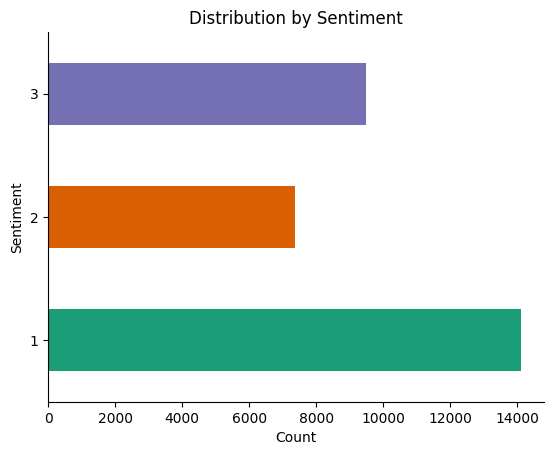

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

data.groupby('Label').size().plot(
    kind='barh',
    color=sns.color_palette('Dark2', n_colors=len(data['Label'].unique()))
)

plt.gca().spines[['top', 'right']].set_visible(False)
plt.title("Distribution by Sentiment")
plt.xlabel("Count")
plt.ylabel("Sentiment")
plt.show()

# TF-IDF

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/load_model/Hasil_Labelling1.csv')

In [ ]:
# Contoh data
# Step 1: Vectorization
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data['stopword_removal'])  # Konversi teks ke vektor numerik
y = data['Label']  # Label

In [ ]:
import numpy as np
import pandas as pd

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data['stopword_removal'])

# Pilih sample ke-n
sample_index = 25

# Ambil data asli
print(f"Show TFIDF sample ke-{sample_index}")
print()
print(data['stopword_removal'].iloc[sample_index])
print()

# Ambil vektor hasil TF-IDF sample ke-40
sample_vector = X[sample_index]

# Ambil daftar semua term (fitur kata) dari vectorizer
terms = vectorizer.get_feature_names_out()

# Konversi sample_vector ke format yang dapat dibaca
sample_vector_dense = sample_vector.todense().tolist()[0]  # bentuk list biasa

# Ambil TF-IDF > 0
nonzero_indices = np.where(np.array(sample_vector_dense) > 0)[0]

# Ambil IDF untuk semua terms
idf_values = vectorizer.idf_

# Buat dataframe untuk tampilan
rows = []

for idx in nonzero_indices:
    tf = sample_vector_dense[idx] / idf_values[idx]
    idf = idf_values[idx]
    tfidf = sample_vector_dense[idx]
    term = terms[idx]
    rows.append({
        'array position': idx,
        'TF': round(tf, 6),
        'IDF': round(idf, 6),
        'TF-IDF': round(tfidf, 6),
        'Term': term
    })

tfidf_df = pd.DataFrame(rows)

# Tampilkan hasil
print(tfidf_df.to_string(index=False))

Show TFIDF sample ke-25

['kodeotp', 'tidak', 'masuk']

 array position      TF       IDF   TF-IDF    Term
           7848 0.08805 10.646238 0.937400 kodeotp
           9160 0.08805  3.467692 0.305330   masuk
          16124 0.08805  1.902307 0.167498   tidak


# SVM 80:20

## Kernel Linear

In [ ]:
# Step 2: Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Training SVM Model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Step 4: Evaluasi Model
y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.95


In [ ]:
print(f'Jumlah data training (80%): {X_train.shape[0]}')
print(f'Jumlah data testing (20%): {X_test.shape[0]}')

Jumlah data training (80%): 24740
Jumlah data testing (20%): 6186


In [ ]:
# Step 5: Menambahkan Prediksi SVM ke DataFrame
# Menambahkan prediksi SVM ke DataFrame uji
data_test = data.iloc[y_test.index].copy()
data_test['label_svm'] = y_pred

In [ ]:
data_test.to_csv('/content/drive/MyDrive/load_model/data_testing_with_svm.csv', index=False)

In [ ]:
# Hitung jumlah data per label_svm
jumlah_label = data_test['label_svm'].value_counts()

# Tampilkan hasil
print(jumlah_label)

label_svm
1    2795
3    1791
2    1600
Name: count, dtype: int64


In [ ]:
import pandas as pd

y_pred = svm_model.predict(X_test)

# Jumlah data training dan testing
print(f'Jumlah data training (80%): {X_train.shape[0]}')
print(f'Jumlah data testing (20%): {X_test.shape[0]}')

# Hitung jumlah masing-masing sentimen di data training
y_train_series = pd.Series(y_train)
train_sentiment_counts = y_train_series.value_counts().sort_index()

print("\nJumlah data per sentimen di data training:")
for label, count in train_sentiment_counts.items():
    print(f"{label}: {count} data")

# Hitung jumlah masing-masing sentimen hasil prediksi
y_pred_series = pd.Series(y_pred)
predicted_sentiment_counts = y_pred_series.value_counts().sort_index()

print("\nJumlah data per sentimen dari hasil prediksi SVM:")
for label, count in predicted_sentiment_counts.items():
    print(f"{label}: {count} data")

Jumlah data training (80%): 24740
Jumlah data testing (20%): 6186

Jumlah data per sentimen di data training:
1: 11249 data
2: 5870 data
3: 7621 data

Jumlah data per sentimen dari hasil prediksi SVM:
1: 2795 data
2: 1600 data
3: 1791 data


In [ ]:
# Menyimpan DataFrame dengan kolom 'label_svm'
df_test.to_csv('/content/drive/MyDrive/load_model/data_test_with_svm.csv', index=False)

# Menampilkan hasil SVM
print(df_test[['stopword_removal','label_svm']].head())

                                        stopword_removal  label_svm
41406  [sangat, puas, cepat, aplikasi, digital, bpjs,...          3
4655   [aplikasi, bodoh, server, busuk, pemerintah, k...          1
34387  [pelayanan, tingkatan, mohon, perbaharui, pela...          3
25590  [aplikasi, login, captcha, salah, teruspadahal...          1
36131  [menyusahkan, orang, berobat, akun, persusah, ...          1


In [ ]:
df_test.head(10)

,userName,score,content,case_folding,hasil_normalisasi,tokenizing,stopword_removal,label_svm
41406,Pengguna Google,5,Sangat puas dan cepat dgn adanya aplikasi digi...,sangat puas dan cepat dgn adanya aplikasi digi...,sangat puas dan cepat dengan adanya aplikasi d...,"[sangat, puas, dan, cepat, dengan, adanya, apl...","[sangat, puas, cepat, aplikasi, digital, bpjs,...",3
4655,Pengguna Google,1,Aplikasi tolol server busuk. Pemerintah korup ...,aplikasi tolol server busuk pemerintah korup g...,aplikasi bodoh server busuk pemerintah korup b...,"[aplikasi, bodoh, server, busuk, pemerintah, k...","[aplikasi, bodoh, server, busuk, pemerintah, k...",1
34387,Pengguna Google,4,Pelayanan di semua tingkatan mohon di perbahar...,pelayanan di semua tingkatan mohon di perbahar...,pelayanan di semua tingkatan mohon di perbahar...,"[pelayanan, di, semua, tingkatan, mohon, di, p...","[pelayanan, tingkatan, mohon, perbaharui, pela...",3
25590,Pengguna Google,1,Ini aplikasi gimana sih mau login aja captcha ...,ini aplikasi gimana sih mau login aja captcha ...,ini aplikasi bagaimana sih mau login saja capt...,"[ini, aplikasi, bagaimana, sih, mau, login, sa...","[aplikasi, login, captcha, salah, teruspadahal...",1
36131,Pengguna Google,1,"Tambah nyusahin aja orang mau berobat, mau bua...",tambah nyusahin aja orang mau berobat mau buat...,tambah menyusahkan saja orang mau berobat mau ...,"[tambah, menyusahkan, saja, orang, mau, beroba...","[menyusahkan, orang, berobat, akun, persusah, ...",1
36834,Pengguna Google,1,Apaan udah nunggu Berjam jam buat daftar gak b...,apaan udah nunggu berjam jam buat daftar gak b...,apaan sudah menunggu berjam jam buat daftar ti...,"[apaan, sudah, menunggu, berjam, jam, buat, da...","[sudah, menunggu, berjam, jam, daftar, tidak, ...",1
3360,Pengguna Google,5,"Bagus,sangat membantu",bagussangat membantu,bagussangat membantu,"[bagussangat, membantu]","[bagussangat, membantu]",3
15502,Pengguna Google,5,Apik,apik,apik,[apik],[apik],2
8840,Pengguna Google,3,karena baru down load ke blm bisa beri komen,karena baru down load ke blm bisa beri komen,karena baru down load ke belum bisa beri komen,"[karena, baru, down, load, ke, belum, bisa, be...","[down, load, bisa, komen]",3
31268,Pengguna Google,5,"simple, mudah",simple mudah,mudah mudah,"[mudah, mudah]","[mudah, mudah]",2


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load data
data = pd.read_csv('/content/drive/MyDrive/load_model/Hasil_Labelling1.csv')

# Step 1: Vectorization
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data['stopword_removal'])  # Konversi teks ke vektor numerik
y = data['Label']  # Label

# Step 2: Split data
X_train, X_test, y_train, y_test, data_train, data_test = train_test_split(
    X, y, data, test_size=0.2, random_state=42
)

# Step 3: Training SVM Model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Step 4: Evaluasi Model
y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Step 5: Menambahkan Prediksi ke DataFrame
data_test = data_test.copy()  # buat salinan biar aman
data_test['label_svm'] = y_pred

# Menyimpan DataFrame
data_test.to_csv('/content/drive/MyDrive/load_model/data_test_with_svm.csv', index=False)

# Menampilkan hasil
print(data_test[['stopword_removal', 'Label', 'label_svm']].head())

Accuracy: 0.95
                                        stopword_removal  Label  label_svm
28713  ['sangat', 'puas', 'cepat', 'aplikasi', 'digit...      3          3
3518   ['aplikasi', 'bodoh', 'server', 'busuk', 'peme...      1          1
24310  ['pelayanan', 'tingkatan', 'mohon', 'perbaharu...      3          3
18456  ['aplikasi', 'login', 'captcha', 'salah', 'ter...      1          1
25391  ['menyusahkan', 'orang', 'berobat', 'akun', 'p...      1          1


In [ ]:
data_test.head(10)

,userName,score,content,case_folding,hasil_normalisasi,tokenizing,stopword_removal,Label,label_svm
28713,Pengguna Google,5,Sangat puas dan cepat dgn adanya aplikasi digi...,sangat puas dan cepat dgn adanya aplikasi digi...,sangat puas dan cepat dengan adanya aplikasi d...,"['sangat', 'puas', 'dan', 'cepat', 'dengan', '...","['sangat', 'puas', 'cepat', 'aplikasi', 'digit...",3,3
3518,Pengguna Google,1,Aplikasi tolol server busuk. Pemerintah korup ...,aplikasi tolol server busuk pemerintah korup g...,aplikasi bodoh server busuk pemerintah korup b...,"['aplikasi', 'bodoh', 'server', 'busuk', 'peme...","['aplikasi', 'bodoh', 'server', 'busuk', 'peme...",1,1
24310,Pengguna Google,4,Pelayanan di semua tingkatan mohon di perbahar...,pelayanan di semua tingkatan mohon di perbahar...,pelayanan di semua tingkatan mohon di perbahar...,"['pelayanan', 'di', 'semua', 'tingkatan', 'moh...","['pelayanan', 'tingkatan', 'mohon', 'perbaharu...",3,3
18456,Pengguna Google,1,Ini aplikasi gimana sih mau login aja captcha ...,ini aplikasi gimana sih mau login aja captcha ...,ini aplikasi bagaimana sih mau login saja capt...,"['ini', 'aplikasi', 'bagaimana', 'sih', 'mau',...","['aplikasi', 'login', 'captcha', 'salah', 'ter...",1,1
25391,Pengguna Google,1,"Tambah nyusahin aja orang mau berobat, mau bua...",tambah nyusahin aja orang mau berobat mau buat...,tambah menyusahkan saja orang mau berobat mau ...,"['tambah', 'menyusahkan', 'saja', 'orang', 'ma...","['menyusahkan', 'orang', 'berobat', 'akun', 'p...",1,1
25814,Pengguna Google,1,Apaan udah nunggu Berjam jam buat daftar gak b...,apaan udah nunggu berjam jam buat daftar gak b...,apaan sudah menunggu berjam jam buat daftar ti...,"['apaan', 'sudah', 'menunggu', 'berjam', 'jam'...","['sudah', 'menunggu', 'berjam', 'jam', 'daftar...",1,1
2541,Pengguna Google,5,"Bagus,sangat membantu",bagussangat membantu,bagussangat membantu,"['bagussangat', 'membantu']","['bagussangat', 'membantu']",3,3
11237,Pengguna Google,5,Apik,apik,apik,['apik'],['apik'],2,2
6504,Pengguna Google,3,karena baru down load ke blm bisa beri komen,karena baru down load ke blm bisa beri komen,karena baru down load ke belum bisa beri komen,"['karena', 'baru', 'down', 'load', 'ke', 'belu...","['down', 'load', 'bisa', 'komen']",2,3
22122,Pengguna Google,5,"simple, mudah",simple mudah,mudah mudah,"['mudah', 'mudah']","['mudah', 'mudah']",2,2


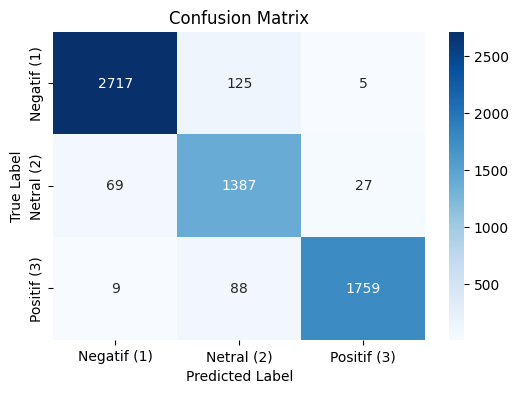

Classification Report:
               precision    recall  f1-score   support

     Negatif       0.97      0.95      0.96      2847
      Netral       0.87      0.94      0.90      1483
     Positif       0.98      0.95      0.96      1856

    accuracy                           0.95      6186
   macro avg       0.94      0.95      0.94      6186
weighted avg       0.95      0.95      0.95      6186



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Hitung confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negatif (1)', 'Netral (2)', 'Positif (3)'],
            yticklabels=['Negatif (1)', 'Netral (2)', 'Positif (3)'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Print Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=['Negatif', 'Netral', 'Positif']))

Visualisasi WordCloud

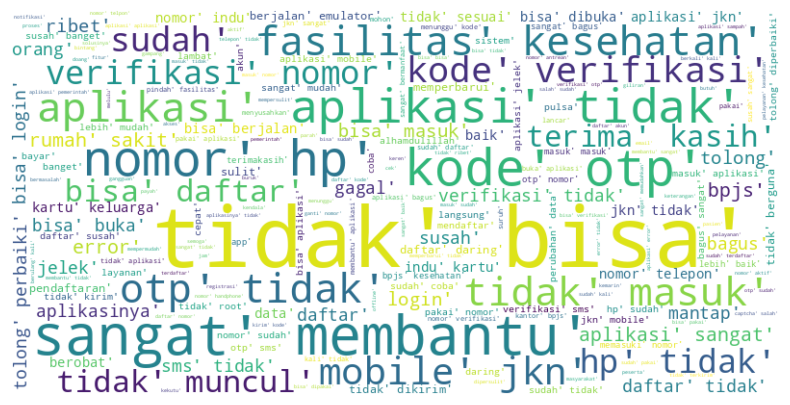

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Menggabungkan seluruh teks setelah stopword removal untuk visualisasi WordCloud
text_combined = ' '.join(data['stopword_removal'])

# Membuat objek WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_combined)

# Menampilkan WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Tidak menampilkan axis
plt.show()

## SVM 70:30 dan 50:50

Accuracy (SVM_70_30 - test_size=0.3): 0.94


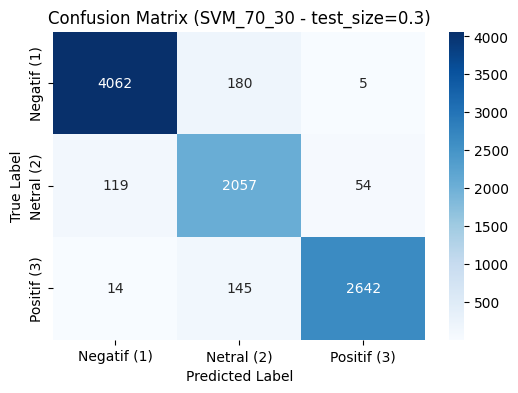

Classification Report (SVM_70_30 - test_size=0.3):
               precision    recall  f1-score   support

     Negatif       0.97      0.96      0.96      4247
      Netral       0.86      0.92      0.89      2230
     Positif       0.98      0.94      0.96      2801

    accuracy                           0.94      9278
   macro avg       0.94      0.94      0.94      9278
weighted avg       0.95      0.94      0.94      9278

Accuracy (SVM_50_50 - test_size=0.5): 0.94


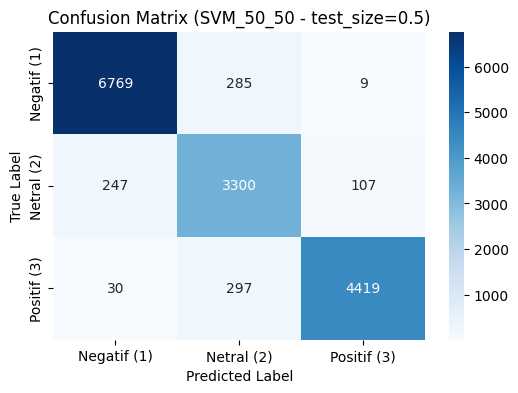

Classification Report (SVM_50_50 - test_size=0.5):
               precision    recall  f1-score   support

     Negatif       0.96      0.96      0.96      7063
      Netral       0.85      0.90      0.88      3654
     Positif       0.97      0.93      0.95      4746

    accuracy                           0.94     15463
   macro avg       0.93      0.93      0.93     15463
weighted avg       0.94      0.94      0.94     15463



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Fungsi untuk training dan evaluasi SVM
def train_svm(X, y, test_ratio, model_name):
    # Split data
    X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X, y, test_size=test_ratio, random_state=42)

    # Inisialisasi dan training model SVM
    svm_model_new = SVC(kernel='linear')
    svm_model_new.fit(X_train_new, y_train_new)

    # Prediksi
    y_pred_new = svm_model_new.predict(X_test_new)

    # Hitung akurasi
    acc_new = accuracy_score(y_test_new, y_pred_new)
    print(f'Accuracy ({model_name} - test_size={test_ratio}): {acc_new:.2f}')

    # Hitung confusion matrix
    cm_new = confusion_matrix(y_test_new, y_pred_new)

    # Plot confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm_new, annot=True, fmt='d', cmap='Blues', xticklabels=['Negatif (1)', 'Netral (2)', 'Positif (3)'],
                yticklabels=['Negatif (1)', 'Netral (2)', 'Positif (3)'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix ({model_name} - test_size={test_ratio})')
    plt.show()

    # Print Classification Report
    print(f"Classification Report ({model_name} - test_size={test_ratio}):\n", classification_report(y_test_new, y_pred_new, target_names=['Negatif', 'Netral', 'Positif']))
    print("="*50)

# Jalankan model dengan test_size 0.3 (70:30) dan 0.5 (50:50)
train_svm(X, y, test_ratio=0.3, model_name="SVM_70_30")
train_svm(X, y, test_ratio=0.5, model_name="SVM_50_50")

Split ulang hanya untuk cek jumlah data

In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd

# Split data 70% train dan 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Cetak jumlah data
print(f'Jumlah data training (70%): {X_train.shape[0]}')
print(f'Jumlah data testing (30%): {X_test.shape[0]}')

# Mapping label sentimen
label_mapping = {
    1: 'Negatif',
    2: 'Netral',
    3: 'Positif'
}

# Hitung jumlah masing-masing sentimen di data training
y_train_series = pd.Series(y_train)
sentimen_counts = y_train_series.value_counts().sort_index()

print("\nJumlah data per sentimen di data training:")
for label, count in sentimen_counts.items():
    label_text = label_mapping.get(label, 'Label Tidak Dikenal')
    print(f"{label} ({label_text}): {count} data")

# Hitung jumlah masing-masing sentimen di data testing
y_test_series = pd.Series(y_test)
sentimen_counts_test = y_test_series.value_counts().sort_index()

print("\nJumlah data per sentimen di data testing:")
for label, count in sentimen_counts_test.items():
    label_text = label_mapping.get(label, 'Label Tidak Dikenal')
    print(f"{label} ({label_text}): {count} data")

Jumlah data training (70%): 21648
Jumlah data testing (30%): 9278

Jumlah data per sentimen di data training:
1 (Negatif): 9867 data
2 (Netral): 5147 data
3 (Positif): 6634 data

Jumlah data per sentimen di data testing:
1 (Negatif): 4229 data
2 (Netral): 2206 data
3 (Positif): 2843 data


In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd

# Split data 70% train dan 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42, stratify=y)

# Cetak jumlah data
print(f'Jumlah data training (70%): {X_train.shape[0]}')
print(f'Jumlah data testing (30%): {X_test.shape[0]}')

# Mapping label sentimen
label_mapping = {
    1: 'Negatif',
    2: 'Netral',
    3: 'Positif'
}

# Hitung jumlah masing-masing sentimen di data training
y_train_series = pd.Series(y_train)
sentimen_counts = y_train_series.value_counts().sort_index()

print("\nJumlah data per sentimen di data training:")
for label, count in sentimen_counts.items():
    label_text = label_mapping.get(label, 'Label Tidak Dikenal')
    print(f"{label} ({label_text}): {count} data")

# Hitung jumlah masing-masing sentimen di data testing
y_test_series = pd.Series(y_test)
sentimen_counts_test = y_test_series.value_counts().sort_index()

print("\nJumlah data per sentimen di data testing:")
for label, count in sentimen_counts_test.items():
    label_text = label_mapping.get(label, 'Label Tidak Dikenal')
    print(f"{label} ({label_text}): {count} data")

Jumlah data training (70%): 15463
Jumlah data testing (30%): 15463

Jumlah data per sentimen di data training:
1 (Negatif): 7048 data
2 (Netral): 3676 data
3 (Positif): 4739 data

Jumlah data per sentimen di data testing:
1 (Negatif): 7048 data
2 (Netral): 3677 data
3 (Positif): 4738 data


Input teks baru untuk diprediksi

In [ ]:
new_reviews = ['Layanannya bagus dan lancar', 'Aplikasinya error', 'Biasa saja']

# Preprocessing: Ubah teks ke dalam bentuk vektor TF-IDF
X_new = vectorizer.transform(new_reviews)

# Prediksi sentimen
predictions = svm_model.predict(X_new)

# Tampilkan hasil prediksi
for review, sentiment in zip(new_reviews, predictions):
    print(f"Review: {review} -> Sentimen: {sentiment}")


Review: Layanannya bagus dan lancar -> Sentimen: 3
Review: Aplikasinya error -> Sentimen: 1
Review: Biasa saja -> Sentimen: 2


In [ ]:
#menyimpan model
import joblib

# # Simpan model SVM
# joblib.dump(svm_model, '/content/drive/MyDrive/load_model/svm_sentiment_model.pkl')

# # Simpan TF-IDF Vectorizer
# joblib.dump(vectorizer, '/content/drive/MyDrive/load_model/tfidf_vectorizer.pkl')

# print("Model dan vectorizer berhasil disimpan!")

In [ ]:
from sklearn.metrics import accuracy_score
from collections import Counter  # juga perlu untuk distribusi label

In [ ]:
# # Load model SVM
# import joblib

# svm_loaded = joblib.load('/content/drive/MyDrive/load_model/svm_sentiment_model (2).pkl')

# # Load vectorizer
# vectorizer_loaded = joblib.load('/content/drive/MyDrive/load_model/tfidf_vectorizer (2).pkl')

# df = pd.read_csv('/content/drive/MyDrive/load_model/Hasil_Labelling1.csv')

# X_text = df['stopword_removal']   # Kolom hasil preprocessing
# y_true = df['Label']

# # 4. Transformasi teks ke vektor TF-IDF
# X_vectorized = vectorizer_loaded.transform(X_text)

# # 5. Prediksi
# y_pred = svm_loaded.predict(X_vectorized)

# # 6. Akurasi
# akurasi = accuracy_score(y_true, y_pred)
# print(f"\nAkurasi Model SVM: {akurasi * 100:.2f}%")

# # 7. Jumlah data
# print(f"Jumlah Total Data: {len(df)}")

# # 8. Distribusi sentimen (label asli dan prediksi)
# print("\nDistribusi Label Asli:")
# for label, count in Counter(y_true).items():
#     print(f"  {label}: {count}")

# print("\nDistribusi Label Prediksi:")
# for label, count in Counter(y_pred).items():
#     print(f"  {label}: {count}")

In [ ]:
# print(f"Kernel yang digunakan: {svm_loaded.kernel}")

## Kernel RBF

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Step 2: Split data (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tambahkan ini untuk melihat jumlah data
print(f'Jumlah data training (80%): {X_train.shape[0]}')
print(f'Jumlah data testing (20%): {X_test.shape[0]}')

# Step 3: Training SVM Model dengan kernel RBF
svm_model_rbf= SVC(kernel='rbf')
svm_model_rbf.fit(X_train, y_train)

# Step 4: Evaluasi Model
y_pred_rbf = svm_model_rbf.predict(X_test)
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
print(f'Accuracy (Linear Kernel - 80:20): {accuracy_rbf:.2f}')

Jumlah data training (80%): 24740
Jumlah data testing (20%): 6186
Accuracy (Linear Kernel - 80:20): 0.93


In [ ]:
import numpy as np

# Step 2: Split data (80:20) untuk mendapatkan X_train, X_test, y_train, y_test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Menghitung jumlah sentimen dalam data training dan testing
sentimen_train = np.bincount(y_train)
sentimen_test = np.bincount(y_test)

# Menampilkan jumlah sentimen pada data training dan testing
print(f'Jumlah sentimen di data training:')
for sentimen, jumlah in enumerate(sentimen_train):
    print(f'Sentimen {sentimen}: {jumlah}')

print('\nJumlah sentimen di data testing:')
for sentimen, jumlah in enumerate(sentimen_test):
    print(f'Sentimen {sentimen}: {jumlah}')

Jumlah sentimen di data training:
Sentimen 0: 0
Sentimen 1: 11249
Sentimen 2: 5870
Sentimen 3: 7621

Jumlah sentimen di data testing:
Sentimen 0: 0
Sentimen 1: 2847
Sentimen 2: 1483
Sentimen 3: 1856


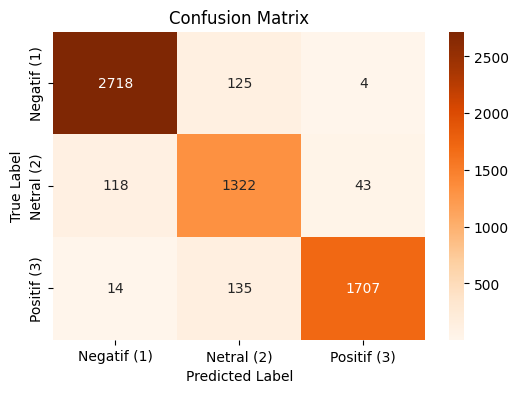

Classification Report:
               precision    recall  f1-score   support

     Negatif       0.95      0.95      0.95      2847
      Netral       0.84      0.89      0.86      1483
     Positif       0.97      0.92      0.95      1856

    accuracy                           0.93      6186
   macro avg       0.92      0.92      0.92      6186
weighted avg       0.93      0.93      0.93      6186



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Hitung confusion matrix
cm = confusion_matrix(y_test, y_pred_rbf)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', xticklabels=['Negatif (1)', 'Netral (2)', 'Positif (3)'],
            yticklabels=['Negatif (1)', 'Netral (2)', 'Positif (3)'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Print Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred_rbf, target_names=['Negatif', 'Netral', 'Positif']))

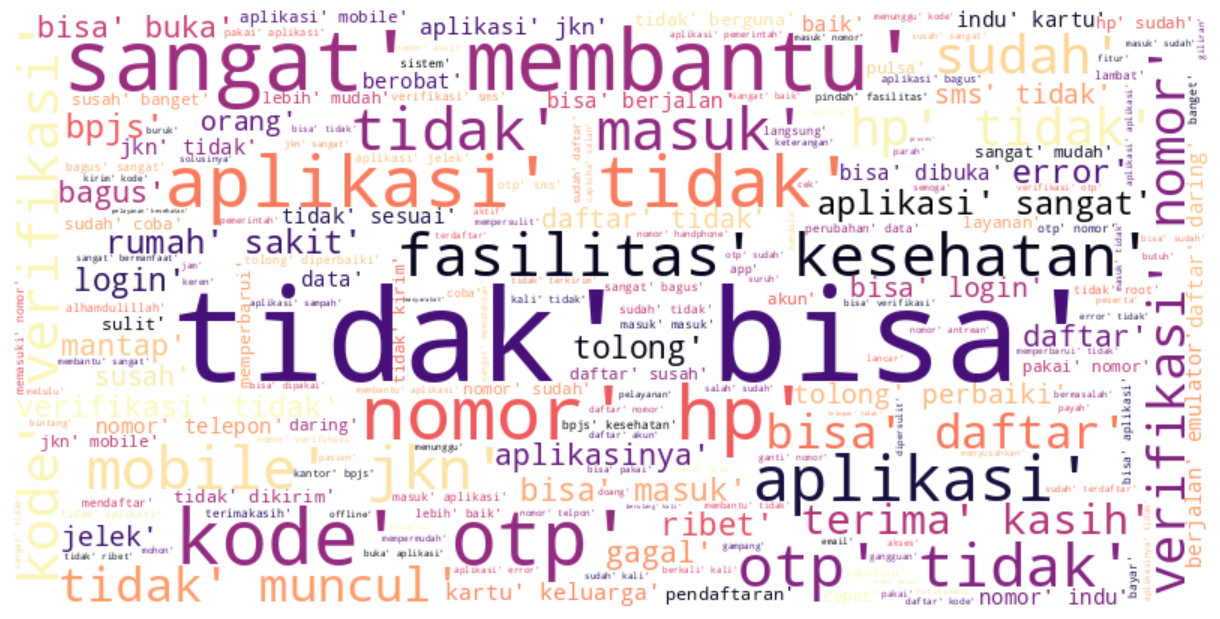

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Gabungkan seluruh teks setelah stopword removal
text_combined = ' '.join(data['stopword_removal'].astype(str))  # pastikan tipe data string

# Buat WordCloud
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='magma',
    max_words=200  # atur berapa kata yang ingin ditampilkan
).generate(text_combined)

# Tampilkan WordCloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

# RBF 70:30 dan 50:50

Accuracy (SVM_70_30 - test_size=0.3 - kernel=rbf): 0.92


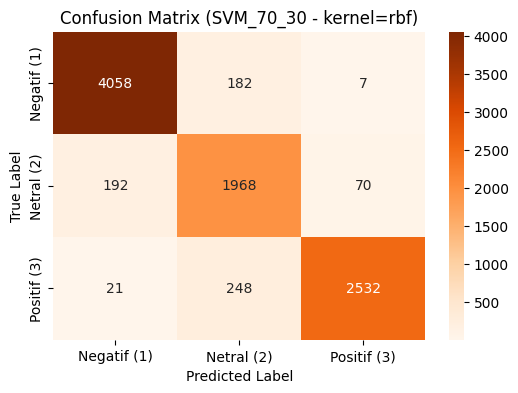

Classification Report (SVM_70_30 - kernel=rbf):
               precision    recall  f1-score   support

     Negatif       0.95      0.96      0.95      4247
      Netral       0.82      0.88      0.85      2230
     Positif       0.97      0.90      0.94      2801

    accuracy                           0.92      9278
   macro avg       0.91      0.91      0.91      9278
weighted avg       0.93      0.92      0.92      9278

Accuracy (SVM_50_50 - test_size=0.5 - kernel=rbf): 0.91


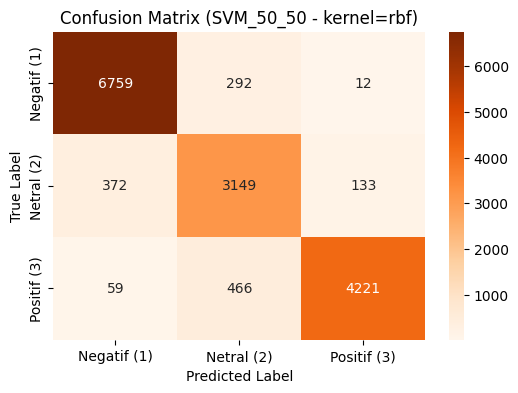

Classification Report (SVM_50_50 - kernel=rbf):
               precision    recall  f1-score   support

     Negatif       0.94      0.96      0.95      7063
      Netral       0.81      0.86      0.83      3654
     Positif       0.97      0.89      0.93      4746

    accuracy                           0.91     15463
   macro avg       0.90      0.90      0.90     15463
weighted avg       0.92      0.91      0.91     15463



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Fungsi untuk training dan evaluasi SVM
def train_svm(X, y, test_ratio, model_name, kernel_type='rbf'):
    # Split data
    X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X, y, test_size=test_ratio, random_state=42)

    # Inisialisasi dan training model SVM dengan kernel rbf
    svm_model_new_rbf = SVC(kernel=kernel_type)
    svm_model_new_rbf.fit(X_train_new, y_train_new)

    # Prediksi
    y_pred_new_rbf = svm_model_new_rbf.predict(X_test_new)

    # Hitung akurasi
    acc_new = accuracy_score(y_test_new, y_pred_new_rbf)
    print(f'Accuracy ({model_name} - test_size={test_ratio} - kernel={kernel_type}): {acc_new:.2f}')

    # Hitung confusion matrix
    cm_new = confusion_matrix(y_test_new, y_pred_new_rbf)

    # Plot confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm_new, annot=True, fmt='d', cmap='Oranges',
                xticklabels=['Negatif (1)', 'Netral (2)', 'Positif (3)'],
                yticklabels=['Negatif (1)', 'Netral (2)', 'Positif (3)'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix ({model_name} - kernel={kernel_type})')
    plt.show()

    # Print Classification Report
    print(f"Classification Report ({model_name} - kernel={kernel_type}):\n",
          classification_report(y_test_new, y_pred_new_rbf, target_names=['Negatif', 'Netral', 'Positif']))
    print("=" * 50)

# Jalankan model dengan test_size 0.3 (70:30) dan 0.5 (50:50), kernel rbf
train_svm(X, y, test_ratio=0.3, model_name="SVM_70_30", kernel_type='rbf')
train_svm(X, y, test_ratio=0.5, model_name="SVM_50_50", kernel_type='rbf')


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

# Fungsi untuk menghitung jumlah sentimen pada data training dan testing
def hitung_sentimen(X, y, test_ratio):
    # Membagi data
    X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X, y, test_size=test_ratio, random_state=42)

    # Menampilkan jumlah data training dan testing
    print(f'Jumlah data training ({100 - test_ratio*100}%): {X_train_new.shape[0]}')
    print(f'Jumlah data testing ({test_ratio*100}%): {X_test_new.shape[0]}')

    # Menghitung jumlah sentimen dalam data training dan testing
    sentimen_train = np.bincount(y_train_new)
    sentimen_test = np.bincount(y_test_new)

    # Menampilkan jumlah sentimen pada data training dan testing
    print(f'Jumlah sentimen di data training:')
    for sentimen, jumlah in enumerate(sentimen_train):
        print(f'Sentimen {sentimen}: {jumlah}')

    print(f'Jumlah sentimen di data testing:')
    for sentimen, jumlah in enumerate(sentimen_test):
        print(f'Sentimen {sentimen}: {jumlah}')
    print("=" * 50)

# Hitung jumlah sentimen untuk rasio 70:30 dan 50:50
hitung_sentimen(X, y, test_ratio=0.3)  # 70:30
hitung_sentimen(X, y, test_ratio=0.5)  # 50:50

Jumlah data training (70.0%): 21648
Jumlah data testing (30.0%): 9278
Jumlah sentimen di data training:
Sentimen 0: 0
Sentimen 1: 9849
Sentimen 2: 5123
Sentimen 3: 6676
Jumlah sentimen di data testing:
Sentimen 0: 0
Sentimen 1: 4247
Sentimen 2: 2230
Sentimen 3: 2801
Jumlah data training (50.0%): 15463
Jumlah data testing (50.0%): 15463
Jumlah sentimen di data training:
Sentimen 0: 0
Sentimen 1: 7033
Sentimen 2: 3699
Sentimen 3: 4731
Jumlah sentimen di data testing:
Sentimen 0: 0
Sentimen 1: 7063
Sentimen 2: 3654
Sentimen 3: 4746


## LDA

In [ ]:
pip install --upgrade gensim

In [ ]:
!pip install numpy==1.23.5
!pip install gensim

In [ ]:
import nltk
import gensim
from gensim import corpora
from nltk.tokenize import word_tokenize

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
from gensim.models import LdaModel

In [ ]:
import gensim
from gensim import corpora
import pandas as pd

# Baca file dataset
df = pd.read_csv("/content/drive/MyDrive/load_model/data_testing_with_svm.csv")
texts = df['stopword_removal'].tolist()
import ast

# Ubah isi kolom stopword_removal dari string ke list
df['stopword_removal'] = df['stopword_removal'].apply(ast.literal_eval)

# Sekarang ambil list-nya
texts = df['stopword_removal'].tolist()

dictionary = corpora.Dictionary(texts)
print(f"Number of unique tokens: {len(dictionary)}")

Number of unique tokens: 5721


In [ ]:
# Convert dokumen ke BOW
corpus = [dictionary.doc2bow(text) for text in texts]
print(f"First document BOW: {corpus[0]}")

First document BOW: [(0, 1), (1, 2), (2, 1), (3, 1), (4, 2), (5, 1), (6, 1), (7, 1), (8, 1)]


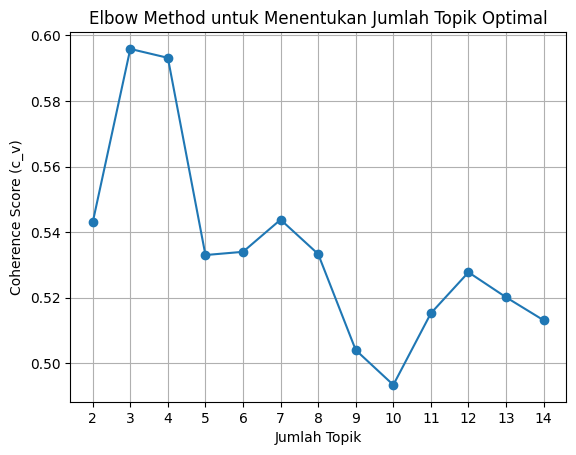

Jumlah Topik = 2 | Coherence Score = 0.5430
Jumlah Topik = 3 | Coherence Score = 0.5959
Jumlah Topik = 4 | Coherence Score = 0.5932
Jumlah Topik = 5 | Coherence Score = 0.5330
Jumlah Topik = 6 | Coherence Score = 0.5340
Jumlah Topik = 7 | Coherence Score = 0.5438
Jumlah Topik = 8 | Coherence Score = 0.5333
Jumlah Topik = 9 | Coherence Score = 0.5040
Jumlah Topik = 10 | Coherence Score = 0.4934
Jumlah Topik = 11 | Coherence Score = 0.5153
Jumlah Topik = 12 | Coherence Score = 0.5278
Jumlah Topik = 13 | Coherence Score = 0.5201
Jumlah Topik = 14 | Coherence Score = 0.5131


In [ ]:
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt

# Fungsi untuk menghitung coherence score untuk berbagai jumlah topik
def compute_coherence_values(dictionary, corpus, texts, start, limit, step):
    coherence_values = []
    model_list = []

    for num_topics in range(start, limit, step):
        model = gensim.models.LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, passes=15, random_state=42)
        model_list.append(model)
        coherence_model = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherence_model.get_coherence())

    return model_list, coherence_values

# Parameter range topik
start = 2
limit = 15
step = 1

# Hitung coherence score
model_list, coherence_values = compute_coherence_values(
    dictionary=dictionary,
    corpus=corpus,
    texts=texts,  # teks hasil stopword removal
    start=start,
    limit=limit,
    step=step
)

# Plot hasil coherence score
x = range(start, limit, step)
plt.plot(x, coherence_values, marker='o')
plt.xlabel("Jumlah Topik")
plt.ylabel("Coherence Score (c_v)")
plt.title("Elbow Method untuk Menentukan Jumlah Topik Optimal")
plt.xticks(x)
plt.grid(True)
plt.show()

# Menampilkan coherence score untuk tiap jumlah topik
for i, val in enumerate(coherence_values):
    print(f"Jumlah Topik = {x[i]} | Coherence Score = {val:.4f}")

Num Topics: 2, UMass Coherence: -2.746396062166448
Num Topics: 3, UMass Coherence: -2.629762710756435
Num Topics: 4, UMass Coherence: -2.7663549008609785
Num Topics: 5, UMass Coherence: -3.520786544247033
Num Topics: 6, UMass Coherence: -5.5837318209271
Num Topics: 7, UMass Coherence: -5.168622062046077
Num Topics: 8, UMass Coherence: -5.524959318812666
Num Topics: 9, UMass Coherence: -5.705829386246233
Num Topics: 10, UMass Coherence: -5.9271450155682
Num Topics: 11, UMass Coherence: -7.447114192874838
Num Topics: 12, UMass Coherence: -7.358627606005953
Num Topics: 13, UMass Coherence: -8.236346012063327
Num Topics: 14, UMass Coherence: -9.411475621456464


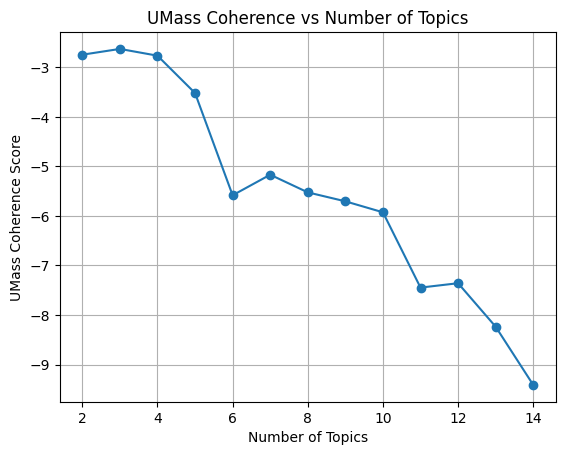

In [ ]:
from gensim.models import LdaModel
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt

umass_scores = []
topic_range = range(2, 15)

for num_topics in topic_range:
    lda = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, passes=15, random_state=42)
    cm = CoherenceModel(model=lda, corpus=corpus, dictionary=dictionary, coherence='u_mass')
    umass = cm.get_coherence()
    umass_scores.append(umass)
    print(f"Num Topics: {num_topics}, UMass Coherence: {umass}")

# Plot hasilnya
plt.plot(topic_range, umass_scores, marker='o')
plt.xlabel("Number of Topics")
plt.ylabel("UMass Coherence Score")
plt.title("UMass Coherence vs Number of Topics")
plt.grid(True)
plt.show()

In [ ]:
# Bangun model LDA
num_topics = 3
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, passes=15, random_state=42)

# Tampilkan topik
for idx, topic in enumerate(lda_model.print_topics(num_topics=num_topics), start=1):
    print(f"Topic {idx}: {topic}")

Topic 1: (0, '0.099*"tidak" + 0.077*"bisa" + 0.038*"aplikasi" + 0.027*"sudah" + 0.025*"nomor" + 0.023*"daftar" + 0.018*"hp" + 0.013*"pakai" + 0.011*"tolong" + 0.010*"root"')
Topic 2: (1, '0.074*"tidak" + 0.048*"kode" + 0.042*"sudah" + 0.040*"otp" + 0.034*"verifikasi" + 0.034*"nomor" + 0.032*"aplikasi" + 0.023*"masuk" + 0.019*"daftar" + 0.016*"kali"')
Topic 3: (2, '0.074*"sangat" + 0.043*"membantu" + 0.034*"bagus" + 0.034*"mudah" + 0.031*"aplikasi" + 0.026*"kesehatan" + 0.025*"jkn" + 0.024*"baik" + 0.018*"lebih" + 0.018*"pelayanan"')


In [ ]:
# Fungsi untuk mendapatkan kata-kata teratas dari setiap topik
def get_topic_keywords(lda_model, num_words=3):
    topic_keywords = {}
    for idx, topic in lda_model.print_topics(-1, num_words=num_words):
        # Ambil kata-kata teratas dari topik
        words = [word.split('*')[1].strip().strip('"') for word in topic.split(' + ')]
        topic_keywords[idx] = ', '.join(words)  # Gabungkan kata-kata menjadi satu string
    return topic_keywords

# Dapatkan kata-kata teratas untuk setiap topik
topic_keywords = get_topic_keywords(lda_model, num_words=20)
print("Topik dan kata-kata teratas:")
for idx, keywords in topic_keywords.items():
    print(f"Topik {idx}: {keywords}")

Topik dan kata-kata teratas:
Topik 0: tidak, bisa, aplikasi, sudah, nomor, daftar, hp, pakai, tolong, root, jkn, error, daring, perbaiki, buka, susah, masuk, kartu, login, emulator
Topik 1: tidak, kode, sudah, otp, verifikasi, nomor, aplikasi, masuk, daftar, kali, sms, susah, banget, hp, muncul, kirim, tolong, dikirim, menunggu, ulang
Topik 2: sangat, membantu, bagus, mudah, aplikasi, kesehatan, jkn, baik, lebih, pelayanan, fasilitas, cepat, mobile, mantap, bpjs, semoga, kasih, terimakasih, memudahkan, aplikasinya


In [ ]:
# Ekstrak topik dominan untuk setiap dokumen
lda_results = [max(lda_model[doc], key=lambda x: x[1])[0] for doc in corpus]

In [ ]:
# Pastikan jumlah hasil topik LDA sesuai dengan jumlah data uji
lda_results = lda_results[:len(df)]  # Potong jika panjang lda_results lebih panjang dari data_test

# Menambahkan hasil topik LDA ke data uji
df['Topik_LDA'] = lda_results

In [ ]:
# Menyimpan DataFrame dengan kolom 'topik_lda'
df.to_csv('/content/drive/MyDrive/load_model/data_with_lda.csv', index=False)

# Menampilkan DataFrame dengan topik LDA
print(df[['stopword_removal', 'Topik_LDA']].head())

                                    stopword_removal  Topik_LDA
0  [sangat, puas, cepat, aplikasi, digital, bpjs,...          2
1  [aplikasi, bodoh, server, busuk, pemerintah, k...          1
2  [pelayanan, tingkatan, mohon, perbaharui, pela...          2
3  [aplikasi, login, captcha, salah, teruspadahal...          1
4  [menyusahkan, orang, berobat, akun, persusah, ...          1


In [ ]:
df.head(10)

,userName,score,content,case_folding,hasil_normalisasi,tokenizing,stopword_removal,label_svm,Topik_LDA
0,Pengguna Google,5,Sangat puas dan cepat dgn adanya aplikasi digi...,sangat puas dan cepat dgn adanya aplikasi digi...,sangat puas dan cepat dengan adanya aplikasi d...,"['sangat', 'puas', 'dan', 'cepat', 'dengan', '...","[sangat, puas, cepat, aplikasi, digital, bpjs,...",3,2
1,Pengguna Google,1,Aplikasi tolol server busuk. Pemerintah korup ...,aplikasi tolol server busuk pemerintah korup g...,aplikasi bodoh server busuk pemerintah korup b...,"['aplikasi', 'bodoh', 'server', 'busuk', 'peme...","[aplikasi, bodoh, server, busuk, pemerintah, k...",1,1
2,Pengguna Google,4,Pelayanan di semua tingkatan mohon di perbahar...,pelayanan di semua tingkatan mohon di perbahar...,pelayanan di semua tingkatan mohon di perbahar...,"['pelayanan', 'di', 'semua', 'tingkatan', 'moh...","[pelayanan, tingkatan, mohon, perbaharui, pela...",3,2
3,Pengguna Google,1,Ini aplikasi gimana sih mau login aja captcha ...,ini aplikasi gimana sih mau login aja captcha ...,ini aplikasi bagaimana sih mau login saja capt...,"['ini', 'aplikasi', 'bagaimana', 'sih', 'mau',...","[aplikasi, login, captcha, salah, teruspadahal...",1,1
4,Pengguna Google,1,"Tambah nyusahin aja orang mau berobat, mau bua...",tambah nyusahin aja orang mau berobat mau buat...,tambah menyusahkan saja orang mau berobat mau ...,"['tambah', 'menyusahkan', 'saja', 'orang', 'ma...","[menyusahkan, orang, berobat, akun, persusah, ...",1,1
5,Pengguna Google,1,Apaan udah nunggu Berjam jam buat daftar gak b...,apaan udah nunggu berjam jam buat daftar gak b...,apaan sudah menunggu berjam jam buat daftar ti...,"['apaan', 'sudah', 'menunggu', 'berjam', 'jam'...","[sudah, menunggu, berjam, jam, daftar, tidak, ...",1,1
6,Pengguna Google,5,"Bagus,sangat membantu",bagussangat membantu,bagussangat membantu,"['bagussangat', 'membantu']","[bagussangat, membantu]",3,2
7,Pengguna Google,5,Apik,apik,apik,['apik'],[apik],2,2
8,Pengguna Google,3,karena baru down load ke blm bisa beri komen,karena baru down load ke blm bisa beri komen,karena baru down load ke belum bisa beri komen,"['karena', 'baru', 'down', 'load', 'ke', 'belu...","[down, load, bisa, komen]",3,0
9,Pengguna Google,5,"simple, mudah",simple mudah,mudah mudah,"['mudah', 'mudah']","[mudah, mudah]",2,2


# **Evaluasi Coherence**

In [ ]:
from gensim.models import CoherenceModel

coherence_model_lda = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v')
coherence_score = coherence_model_lda.get_coherence()
print(f"Coherence Score: {coherence_score}")

Coherence Score: 0.5959024611318616


In [ ]:
import pandas as pd

# Baca file CSV
df_svm = pd.read_csv('/content/drive/MyDrive/load_model/data_test_with_svm.csv')
df_lda = pd.read_csv('/content/drive/MyDrive/load_model/data_with_lda.csv')

# Hapus duplikat di df_lda berdasarkan 'stopword_removal'
df_lda_unique = df_lda[['stopword_removal', 'Topik_LDA']].drop_duplicates(subset='stopword_removal')

# Gabungkan data
final_df = df_svm.merge(df_lda_unique, on='stopword_removal', how='left')

# Tampilkan hasil
print(final_df[['stopword_removal', 'Label', 'label_svm', 'Topik_LDA']].head())

# Simpan ke CSV
final_df.to_csv('/content/drive/MyDrive/load_model/final_result1.csv', index=False)

                                    stopword_removal  Label  label_svm  \
0  ['sangat', 'puas', 'cepat', 'aplikasi', 'digit...      3          3   
1  ['aplikasi', 'bodoh', 'server', 'busuk', 'peme...      1          1   
2  ['pelayanan', 'tingkatan', 'mohon', 'perbaharu...      3          3   
3  ['aplikasi', 'login', 'captcha', 'salah', 'ter...      1          1   
4  ['menyusahkan', 'orang', 'berobat', 'akun', 'p...      1          1   

   Topik_LDA  
0          2  
1          1  
2          2  
3          1  
4          1  


# Visualisasi LDA

In [ ]:
pip install pyldavis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 3.2 MB/s eta 0:00:00
  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 32.1 MB/s eta 0:00:00
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
tsfresh 0.21.0 requires scipy>=1.14.0; python_version >= "3.10", but you have scipy 1.13.1 which is incompatible.


In [ ]:
import pyLDAvis.gensim
import pickle
import pyLDAvis

# Persiapkan visualisasi LDA
lda_vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary)

# Tampilkan visualisasi
pyLDAvis.display(lda_vis)

# Mendapatkan distribusi probabilitas topik untuk setiap ulasan

In [ ]:
# Menghitung jumlah data pada setiap topik
topic_counts = df['Topik_LDA'].value_counts()

# Menampilkan jumlah data per topik
print("\nJumlah data per topik:")
print(topic_counts)


Jumlah data per topik:
Topik_LDA
2    2495
0    2078
1    1613
Name: count, dtype: int64


In [ ]:
# Menghitung distribusi label (0, 1, 2) di setiap topik
label_distribution = final_df.groupby('Topik_LDA')['label_svm'].value_counts().unstack(fill_value=0)

# Menampilkan distribusi label per topik
print("\nDistribusi label per topik:")
print(label_distribution)


Distribusi label per topik:
label_svm     1    2     3
Topik_LDA                 
0          1324  546   208
1          1250  276    87
2           221  778  1496


In [ ]:
# Ubah hasil value_counts() menjadi DataFrame
df_topic_counts = topic_counts.reset_index()
df_topic_counts.columns = ['Topik_LDA', 'Document Count']

# Tambahkan kolom persentase
df_topic_counts['Percentage'] = (df_topic_counts['Document Count'] / len(df)) * 100

# Tampilkan hasil
print(df_topic_counts)

   Topik_LDA  Document Count  Percentage
0          2            2495   40.333010
1          0            2078   33.591982
2          1            1613   26.075008


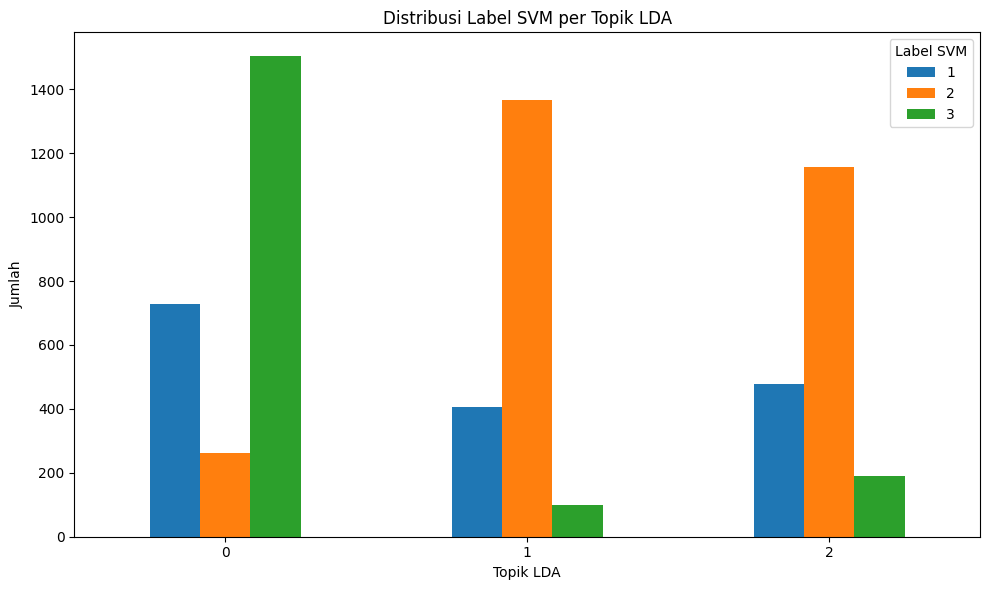

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Data distribusi
data = {
    'label_svm': [1, 2, 3],
    0: [727, 261, 1503],
    1: [406, 1365, 99],
    2: [478, 1158, 189]
}

# Buat DataFrame
df = pd.DataFrame(data)
df.set_index('label_svm', inplace=True)
df = df.T  # Transpose agar Topik di X-axis

# Plot
ax = df.plot(kind='bar', figsize=(10, 6))
plt.title("Distribusi Label SVM per Topik LDA")
plt.xlabel("Topik LDA")
plt.ylabel("Jumlah")
plt.xticks(rotation=0)
plt.legend(title="Label SVM")
plt.tight_layout()
plt.show()

In [ ]:
import pickle

# Simpan model LDA
lda_model.save("/content/drive/MyDrive/load_model/lda_gensim.model")

# Simpan dictionary
with open("lda_dictionary.pkl", "wb") as f:
    pickle.dump(dictionary, f)

# Simpan corpus
with open("lda_corpus.pkl", "wb") as f:
    pickle.dump(corpus, f)

print("Model LDA, dictionary, dan corpus berhasil disimpan!")

Model LDA, dictionary, dan corpus berhasil disimpan!


In [ ]:
from gensim.models import LdaModel

# Load model LDA
lda_model = LdaModel.load("/content/drive/MyDrive/load_model/lda_gensim.model")

# Load dictionary
with open("lda_dictionary.pkl", "rb") as f:
    dictionary = pickle.load(f)

# Load corpus
with open("lda_corpus.pkl", "rb") as f:
    corpus = pickle.load(f)

print("Model LDA, dictionary, dan corpus berhasil dimuat kembali!")

Model LDA, dictionary, dan corpus berhasil dimuat kembali!


In [ ]:
# Dataset baru untuk diuji
new_texts = [
    ["pelayanan", "pelanggan", "buruk", "tidak", "ramah", "kecewa"],
    ["produk", "berkualitas", "bagus", "sesuai", "deskripsi", "tahan", "lama"],
    ["pengiriman", "sangat", "lambat", "pesanan", "terlalu", "lama"],
    ["layanan", "pelanggan", "membantu", "cepat", "solusi", "puas"],
    ["produk", "tidak", "sesuai", "ekspektasi", "kecewa", "deskripsi", "berbeda"],
    ["pengiriman", "cepat", "aman", "kemasan", "bagus"],
    ["harga", "mahal", "tetapi", "kualitas", "bagus", "premium"],
    ["layanan", "chatbot", "tidak", "berguna", "jawaban", "tidak", "membantu"]
]

# Konversi teks baru ke BoW menggunakan dictionary lama
new_corpus = [dictionary.doc2bow(text) for text in new_texts]

In [ ]:
# Prediksi topik untuk dataset baru
topic_results = {0: [], 1: [], 2: []}  # Dictionary untuk menyimpan distribusi kata-kata per topik

for i, bow in enumerate(new_corpus):
    topic_distribution = lda_model.get_document_topics(bow)  # Distribusi probabilitas topik
    predicted_topic = max(topic_distribution, key=lambda x: x[1])[0]  # Pilih topik dengan probabilitas tertinggi
    topic_results[predicted_topic].extend(new_texts[i])  # Masukkan kata-kata ke topik yang sesuai

# Hitung distribusi kata di setiap topik
from collections import Counter

for topic, words in topic_results.items():
    word_freq = Counter(words).most_common(10)  # Ambil 10 kata paling sering muncul
    formatted_words = " + ".join([f'{round(freq/len(words), 3)}*"{word}"' for word, freq in word_freq])
    print(f'Topic {topic}: ({topic}, "{formatted_words}")')

Topic 0: (0, "0.214*"tidak" + 0.071*"produk" + 0.071*"sesuai" + 0.071*"ekspektasi" + 0.071*"kecewa" + 0.071*"deskripsi" + 0.071*"berbeda" + 0.071*"layanan" + 0.071*"chatbot" + 0.071*"berguna"")
Topic 1: (1, "0.167*"pengiriman" + 0.167*"sangat" + 0.167*"lambat" + 0.167*"pesanan" + 0.167*"terlalu" + 0.167*"lama"")
Topic 2: (2, "0.1*"bagus" + 0.067*"pelanggan" + 0.067*"cepat" + 0.033*"pelayanan" + 0.033*"buruk" + 0.033*"tidak" + 0.033*"ramah" + 0.033*"kecewa" + 0.033*"produk" + 0.033*"berkualitas"")


# Servqual

In [ ]:
from collections import defaultdict

# Data LDA dan SERVQUAL tetap seperti sebelumnya
lda_topics = {
    0: ["sangat", "membantu", "bagus", "aplikasi", "mudah", "kesehatan", "jkn", "bpjs", "fasilitas", "baik", "lebih", "pelayanan", "kasih", "mantap", "cepat", "mobile", "memudahkan", "sakit", "terima", "semoga"],
    1: ["tidak", "kode", "aplikasi", "otp", "verifikasi", "nomor", "sudah", "masuk", "susah", "daftar", "sms", "banget", "menunggu", "kali", "kirim", "pulsa", "muncul", "coba", "ribet", "berguna"],
    2: ["tidak", "bisa", "aplikasi", "sudah", "hp", "daftar", "nomor", "login", "tolong", "pakai", "root", "jkn", "emulator", "error", "buka", "memperbarui", "masuk", "salah", "kartu", "perbaiki"]
}

servqual_data = {
    'tangibles': ["Menu lengkap", "Tampilan menarik", "Warna dan ukuran font tepat", "Ketersediaan panduan atau tutorial penggunaan aplikasi"],
    'reliability': ["Mudah digunakan", "Informasi mudah dipahami", "Jarang mengalami error", "Data yang disajikan selalu diperbarui", "Semua proses berjalan lancar dan tidak gagal","Kemudahan akses kapan saja dan dimana saja"],
    'responsiveness': ["Merespon input pengguna dengan cepat", "Membantu pengguna mengatasi kendala administrasi", "Respon yang diberikan sesuai dengan keluhan dan kebutuhan pengguna"],
    'assurance': ["Data pribadi pengguna aman", "Verifikasi kode OTP dapat digunakan dengan aman","Tagihan akurat dan proses auto debet aman"],
    'empathy': ["Customer service merespon kebutuhan dan keluhan pengguna dengan ramah.", "Customer service meminta maaf jika ada kendala.", "Aplikasi nyaman digunakan", "Mengerti kebutuhan pengguna", "Memberi informasi yang dibutuhkan"]
}

# Preprocess SERVQUAL
servqual_words = {dim: " ".join(sentences).lower().split() for dim, sentences in servqual_data.items()}

# Step 1: Hitung semua skor kecocokan kata LDA dengan SERVQUAL
match_scores = defaultdict(dict)

for topic_idx, words in lda_topics.items():
    for dim, servqual_word_list in servqual_words.items():
        count = sum(1 for word in words if word in servqual_word_list)
        match_scores[topic_idx][dim] = count

# Step 2: Pemetaan unik: setiap topik ke dimensi berbeda
assigned_dims = set()
topic_servqual_match = {}

# Greedy: urutkan topik berdasarkan skor tertinggi untuk setiap dimensi
for topic_idx, scores in match_scores.items():
    sorted_dims = sorted(scores.items(), key=lambda x: x[1], reverse=True)
    for dim, score in sorted_dims:
        if dim not in assigned_dims:
            topic_servqual_match[topic_idx] = [dim]
            assigned_dims.add(dim)
            break
    else:
        topic_servqual_match[topic_idx] = ["Tidak Ada Kecocokan"]

# Step 3: Tampilkan hasil akhir
for topic, matches in topic_servqual_match.items():
    print(f"Topik {topic} paling sesuai dengan dimensi SERVQUAL: {', '.join(matches)}")

Topik 0 paling sesuai dengan dimensi SERVQUAL: responsiveness
Topik 1 paling sesuai dengan dimensi SERVQUAL: assurance
Topik 2 paling sesuai dengan dimensi SERVQUAL: reliability


In [ ]:
import pandas as pd

# Langkah 8: Simpan hasil pencocokan ke dalam DataFrame
df_match = pd.DataFrame([
    {"Topik": topic, "Dimensi_SERVQUAL": matches[0]}
    for topic, matches in topic_servqual_match.items()
])

# Langkah 9: Simpan ke file CSV
df_match.to_csv("/content/drive/MyDrive/load_model/Hasil_Pemetaan_Servqual.csv", index=False)

# Tampilkan DataFrame
print("\nHasil pencocokan disimpan dalam 'Hasil_Pemetaan_Servqual.csv':")
display(df_match)


Hasil pencocokan disimpan dalam 'Hasil_Pemetaan_Servqual.csv':


,Topik,Dimensi_SERVQUAL
0,0,responsiveness
1,1,assurance
2,2,reliability


Servqual semua ulasan

In [ ]:
import pandas as pd
import ast
from collections import defaultdict

# 1. Baca file dataset
file_path = "/content/drive/MyDrive/load_model/final_result1.csv"
df = pd.read_csv(file_path)

# 2. Ubah string list menjadi list asli
df['processed_words'] = df['stopword_removal'].apply(ast.literal_eval)

# 3. SERVQUAL kalimat
servqual_data = {
    'tangibles': ["Menu lengkap", "Tampilan menarik", "Warna dan ukuran font tepat", "Ketersediaan panduan atau tutorial penggunaan aplikasi"],
    'reliability': ["Mudah digunakan", "Informasi mudah dipahami", "Jarang mengalami error", "Data yang disajikan selalu diperbarui", "Semua proses berjalan lancar dan tidak gagal","Kemudahan akses kapan saja dan dimana saja"],
    'responsiveness': ["Merespon input pengguna dengan cepat", "Membantu pengguna mengatasi kendala administrasi", "Respon yang diberikan sesuai dengan keluhan dan kebutuhan pengguna"],
    'assurance': ["Data pribadi pengguna aman", "Verifikasi kode OTP dapat digunakan dengan aman","Tagihan akurat dan proses auto debet aman"],
    'empathy': ["Customer service merespon kebutuhan dan keluhan pengguna dengan ramah.", "Customer service meminta maaf jika ada kendala.", "Aplikasi nyaman digunakan", "Mengerti kebutuhan pengguna", "Memberi informasi yang dibutuhkan"]
}

# 4. Encoding dan decoding SERVQUAL
encoded_servqual = {
    dim: [word.encode('utf-8') for word in " ".join(sentences).lower().split()]
    for dim, sentences in servqual_data.items()
}
decoded_servqual = {
    dim: [word.decode('utf-8') for word in words]
    for dim, words in encoded_servqual.items()
}

# 5. Fungsi pelabelan review berdasarkan encoding-decoding kata
def label_servqual_encoded(word_list):
    # Encode kata-kata dari review
    encoded_review = [word.encode('utf-8') for word in word_list]
    decoded_review = [word.decode('utf-8') for word in encoded_review]

    match_score = defaultdict(int)

    for dim, servqual_words in decoded_servqual.items():
        for word in decoded_review:
            if word in servqual_words:
                match_score[dim] += 1

    if match_score:
        top_match = max(match_score.items(), key=lambda x: x[1])[0]
        return top_match
    else:
        return "Tidak Ada Kecocokan"

# 6. Terapkan ke setiap baris
df['servqual_label'] = df['processed_words'].apply(label_servqual_encoded)

# 7. Simpan ke file baru
output_path = "/content/drive/MyDrive/load_model/final_result_labeled_encoded.csv"
df.to_csv(output_path, index=False)

print("Labeling selesai dengan teknik encoding-decoding! Disimpan di:", output_path)

Labeling selesai dengan teknik encoding-decoding! Disimpan di: /content/drive/MyDrive/load_model/final_result_labeled_encoded.csv


In [ ]:
# Hitung jumlah kemunculan masing-masing label SERVQUAL
label_counts = df['servqual_label'].value_counts()

# Tampilkan hasil
print("Jumlah data per label SERVQUAL:")
print(label_counts)

Jumlah data per label SERVQUAL:
servqual_label
reliability            2255
Tidak Ada Kecocokan    1680
tangibles              1108
assurance               596
responsiveness          492
empathy                  55
Name: count, dtype: int64


In [ ]:
import pandas as pd

file_path = '/content/drive/MyDrive/load_model/final_result_labeled_encoded.csv'
data = pd.read_csv(file_path)

# Hitung jumlah sentimen per SERVQUAL
sentiment_counts = data.groupby(['servqual_label', 'label_svm']).size().unstack(fill_value=0)

# Hitung jumlah topik per SERVQUAL
topic_counts = data.groupby(['servqual_label', 'Topik_LDA']).size().unstack(fill_value=0)

# Tampilkan hasil
print("=== Jumlah Sentimen per SERVQUAL ===")
print(sentiment_counts)

print("\n=== Jumlah Topik per SERVQUAL ===")
print(topic_counts)

=== Jumlah Sentimen per SERVQUAL ===
label_svm              1     2    3
servqual_label                     
Tidak Ada Kecocokan  703   247  730
assurance             95   469   32
empathy               13    20   22
reliability          563  1257  435
responsiveness        42    12  438
tangibles            195   779  134

=== Jumlah Topik per SERVQUAL ===
Topik_LDA               0    1     2
servqual_label                      
Tidak Ada Kecocokan   375  229  1076
assurance              51  535    10
empathy                27    5    23
reliability          1167  529   559
responsiveness         18    6   468
tangibles             440  309   359


# Encoding-Decoding Guided LDA

In [ ]:
from collections import defaultdict

# Data LDA dan SERVQUAL tetap seperti sebelumnya
lda_topics = {
    0 : ["tidak", "bisa", "aplikasi", "sudah", "nomor", "daftar", "hp", "pakai", "tolong", "root", "jkn", "error", "daring", "perbaiki", "buka", "susah", "masuk", "kartu", "login", "emulator"],
    1 : ["tidak", "kode", "sudah", "otp", "verifikasi", "nomor", "aplikasi", "masuk", "daftar", "kali", "sms", "susah", "banget", "hp", "muncul", "kirim", "tolong", "dikirim", "menunggu", "ulang"],
    2 : ["sangat", "membantu", "bagus", "mudah", "aplikasi", "kesehatan", "jkn", "baik", "lebih", "pelayanan", "fasilitas", "cepat", "mobile", "mantap", "bpjs", "semoga", "kasih", "terimakasih", "memudahkan", "aplikasinya"]
}

servqual_data = {
    'tangibles': ["tidak", "bisa", "aplikasi", "root", "hp", "emulator", "sudah", "buka", "jkn", "error", "berjalan", "tolong", "dibuka", "masuk", "aplikasinya"],
    'reliability': ["tidak", "nomor", "bisa", "sudah", "aplikasi", "daftar", "login", "hp", "masuk", "susah", "salah", "pakai", "kartu", "keluarga", "verifikasi"],
    'responsiveness': ["tidak", "bisa", "aplikasi", "daftar", "kesehatan", "bpjs", "daring", "fasilitas", "sudah", "sakit", "rumah", "jkn", "antrean", "sangat", "rujukan"],
    'assurance': ["tidak", "kode", "otp", "nomor", "verifikasi", "sudah", "aplikasi", "masuk", "bisa", "daftar", "sms", "kirim", "hp", "susah", "kali"],
    'empathy': ["sangat", "membantu", "mudah", "bagus", "aplikasi", "baik", "jkn", "pelayanan", "cepat", "kesehatan", "mantap", "lebih", "semoga", "mobile", "bpjs"]
}

# Preprocess SERVQUAL
servqual_words = {dim: " ".join(sentences).lower().split() for dim, sentences in servqual_data.items()}

# Step 1: Hitung semua skor kecocokan kata LDA dengan SERVQUAL
match_scores = defaultdict(dict)

for topic_idx, words in lda_topics.items():
    for dim, servqual_word_list in servqual_words.items():
        count = sum(1 for word in words if word in servqual_word_list)
        match_scores[topic_idx][dim] = count

# Step 2: Pemetaan unik: setiap topik ke dimensi berbeda
assigned_dims = set()
topic_servqual_match = {}

# Greedy: urutkan topik berdasarkan skor tertinggi untuk setiap dimensi
for topic_idx, scores in match_scores.items():
    sorted_dims = sorted(scores.items(), key=lambda x: x[1], reverse=True)
    for dim, score in sorted_dims:
        if dim not in assigned_dims:
            topic_servqual_match[topic_idx] = [dim]
            assigned_dims.add(dim)
            break
    else:
        topic_servqual_match[topic_idx] = ["Tidak Ada Kecocokan"]

# Step 3: Tampilkan hasil akhir
for topic, matches in topic_servqual_match.items():
    print(f"Topik {topic} paling sesuai dengan dimensi SERVQUAL: {', '.join(matches)}")

Topik 0 paling sesuai dengan dimensi SERVQUAL: tangibles
Topik 1 paling sesuai dengan dimensi SERVQUAL: assurance
Topik 2 paling sesuai dengan dimensi SERVQUAL: empathy


In [ ]:
import pandas as pd
import ast
from collections import defaultdict

# 1. Baca file dataset
file_path = "/content/drive/MyDrive/load_model/final_result1.csv"
df = pd.read_csv(file_path)

# 2. Ubah string list menjadi list asli
df['processed_words'] = df['stopword_removal'].apply(ast.literal_eval)

# 3. SERVQUAL kalimat
servqual_data = {
    'tangibles': ["tidak", "bisa", "aplikasi", "root", "hp", "emulator", "sudah", "buka", "jkn", "error", "berjalan", "tolong", "dibuka", "masuk", "aplikasinya"],
    'reliability': ["tidak", "nomor", "bisa", "sudah", "aplikasi", "daftar", "login", "hp", "masuk", "susah", "salah", "pakai", "kartu", "keluarga", "verifikasi"],
    'responsiveness': ["tidak", "bisa", "aplikasi", "daftar", "kesehatan", "bpjs", "daring", "fasilitas", "sudah", "sakit", "rumah", "jkn", "antrean", "sangat", "rujukan"],
    'assurance': ["tidak", "kode", "otp", "nomor", "verifikasi", "sudah", "aplikasi", "masuk", "bisa", "daftar", "sms", "kirim", "hp", "susah", "kali"],
    'empathy': ["sangat", "membantu", "mudah", "bagus", "aplikasi", "baik", "jkn", "pelayanan", "cepat", "kesehatan", "mantap", "lebih", "semoga", "mobile", "bpjs"]
}

# 4. Encoding dan decoding SERVQUAL
encoded_servqual = {
    dim: [word.encode('utf-8') for word in " ".join(sentences).lower().split()]
    for dim, sentences in servqual_data.items()
}
decoded_servqual = {
    dim: [word.decode('utf-8') for word in words]
    for dim, words in encoded_servqual.items()
}

# 5. Fungsi pelabelan review berdasarkan encoding-decoding kata
def label_servqual_encoded(word_list):
    # Encode kata-kata dari review
    encoded_review = [word.encode('utf-8') for word in word_list]
    decoded_review = [word.decode('utf-8') for word in encoded_review]

    match_score = defaultdict(int)

    for dim, servqual_words in decoded_servqual.items():
        for word in decoded_review:
            if word in servqual_words:
                match_score[dim] += 1

    if match_score:
        top_match = max(match_score.items(), key=lambda x: x[1])[0]
        return top_match
    else:
        return "Tidak Ada Kecocokan"

# 6. Terapkan ke setiap baris
df['servqual_label'] = df['processed_words'].apply(label_servqual_encoded)

# 7. Simpan ke file baru
output_path = "/content/drive/MyDrive/load_model/glda_labeled_encoded.csv"
df.to_csv(output_path, index=False)

print("Labeling selesai dengan teknik encoding-decoding! Disimpan di:", output_path)

Labeling selesai dengan teknik encoding-decoding! Disimpan di: /content/drive/MyDrive/load_model/glda_labeled_encoded.csv


In [ ]:
df.head(10)

,userName,score,content,case_folding,hasil_normalisasi,tokenizing,stopword_removal,Label,label_svm,Topik_LDA,processed_words,servqual_label
0,Pengguna Google,5,Sangat puas dan cepat dgn adanya aplikasi digi...,sangat puas dan cepat dgn adanya aplikasi digi...,sangat puas dan cepat dengan adanya aplikasi d...,"['sangat', 'puas', 'dan', 'cepat', 'dengan', '...","['sangat', 'puas', 'cepat', 'aplikasi', 'digit...",3,3,2,"[sangat, puas, cepat, aplikasi, digital, bpjs,...",empathy
1,Pengguna Google,1,Aplikasi tolol server busuk. Pemerintah korup ...,aplikasi tolol server busuk pemerintah korup g...,aplikasi bodoh server busuk pemerintah korup b...,"['aplikasi', 'bodoh', 'server', 'busuk', 'peme...","['aplikasi', 'bodoh', 'server', 'busuk', 'peme...",1,1,1,"[aplikasi, bodoh, server, busuk, pemerintah, k...",tangibles
2,Pengguna Google,4,Pelayanan di semua tingkatan mohon di perbahar...,pelayanan di semua tingkatan mohon di perbahar...,pelayanan di semua tingkatan mohon di perbahar...,"['pelayanan', 'di', 'semua', 'tingkatan', 'moh...","['pelayanan', 'tingkatan', 'mohon', 'perbaharu...",3,3,2,"[pelayanan, tingkatan, mohon, perbaharui, pela...",empathy
3,Pengguna Google,1,Ini aplikasi gimana sih mau login aja captcha ...,ini aplikasi gimana sih mau login aja captcha ...,ini aplikasi bagaimana sih mau login saja capt...,"['ini', 'aplikasi', 'bagaimana', 'sih', 'mau',...","['aplikasi', 'login', 'captcha', 'salah', 'ter...",1,1,1,"[aplikasi, login, captcha, salah, teruspadahal...",reliability
4,Pengguna Google,1,"Tambah nyusahin aja orang mau berobat, mau bua...",tambah nyusahin aja orang mau berobat mau buat...,tambah menyusahkan saja orang mau berobat mau ...,"['tambah', 'menyusahkan', 'saja', 'orang', 'ma...","['menyusahkan', 'orang', 'berobat', 'akun', 'p...",1,1,1,"[menyusahkan, orang, berobat, akun, persusah, ...",reliability
5,Pengguna Google,1,Apaan udah nunggu Berjam jam buat daftar gak b...,apaan udah nunggu berjam jam buat daftar gak b...,apaan sudah menunggu berjam jam buat daftar ti...,"['apaan', 'sudah', 'menunggu', 'berjam', 'jam'...","['sudah', 'menunggu', 'berjam', 'jam', 'daftar...",1,1,1,"[sudah, menunggu, berjam, jam, daftar, tidak, ...",reliability
6,Pengguna Google,5,"Bagus,sangat membantu",bagussangat membantu,bagussangat membantu,"['bagussangat', 'membantu']","['bagussangat', 'membantu']",3,3,2,"[bagussangat, membantu]",empathy
7,Pengguna Google,5,Apik,apik,apik,['apik'],['apik'],2,2,2,[apik],Tidak Ada Kecocokan
8,Pengguna Google,3,karena baru down load ke blm bisa beri komen,karena baru down load ke blm bisa beri komen,karena baru down load ke belum bisa beri komen,"['karena', 'baru', 'down', 'load', 'ke', 'belu...","['down', 'load', 'bisa', 'komen']",2,3,0,"[down, load, bisa, komen]",tangibles
9,Pengguna Google,5,"simple, mudah",simple mudah,mudah mudah,"['mudah', 'mudah']","['mudah', 'mudah']",2,2,2,"[mudah, mudah]",empathy


In [ ]:
servqual_counts = df['servqual_label'].value_counts()

# Cetak hasil
print("Jumlah review per dimensi SERVQUAL:")
print(servqual_counts)

Jumlah review per dimensi SERVQUAL:
servqual_label
empathy                1522
tangibles              1360
assurance               994
reliability             927
responsiveness          748
Tidak Ada Kecocokan     635
Name: count, dtype: int64


# Encoding-Decoding + Filtering

## Per Topik

In [ ]:
from collections import defaultdict

# === Data LDA Topik (contoh dari hasil Guided LDA) ===
lda_topics = {
    0 : ["tidak", "bisa", "aplikasi", "sudah", "nomor", "daftar", "hp", "pakai", "tolong", "root", "jkn", "error", "daring", "perbaiki", "buka", "susah", "masuk", "kartu", "login", "emulator"],
    1 : ["tidak", "kode", "sudah", "otp", "verifikasi", "nomor", "aplikasi", "masuk", "daftar", "kali", "sms", "susah", "banget", "hp", "muncul", "kirim", "tolong", "dikirim", "menunggu", "ulang"],
    2 : ["sangat", "membantu", "bagus", "mudah", "aplikasi", "kesehatan", "jkn", "baik", "lebih", "pelayanan", "fasilitas", "cepat", "mobile", "mantap", "bpjs", "semoga", "kasih", "terimakasih", "memudahkan", "aplikasinya"]
}

# === Kata-Kata Khusus SERVQUAL ===
servqual_data = {
    'tangibles': ["tidak", "bisa", "aplikasi", "root", "hp", "emulator", "sudah", "buka", "jkn", "error", "berjalan", "tolong", "dibuka", "masuk", "aplikasinya"],
    'reliability': ["tidak", "nomor", "bisa", "sudah", "aplikasi", "daftar", "login", "hp", "masuk", "susah", "salah", "pakai", "kartu", "keluarga", "verifikasi"],
    'responsiveness': ["tidak", "bisa", "aplikasi", "daftar", "kesehatan", "bpjs", "daring", "fasilitas", "sudah", "sakit", "rumah", "jkn", "antrean", "sangat", "rujukan"],
    'assurance': ["tidak", "kode", "otp", "nomor", "verifikasi", "sudah", "aplikasi", "masuk", "bisa", "daftar", "sms", "kirim", "hp", "susah", "kali"],
    'empathy': ["sangat", "membantu", "mudah", "bagus", "aplikasi", "baik", "jkn", "pelayanan", "cepat", "kesehatan", "mantap", "lebih", "semoga", "mobile", "bpjs"]
}

# === Encoding-Decoding SERVQUAL Words ===
encoded_servqual = {
    dim: [word.encode('utf-8') for word in words]
    for dim, words in servqual_data.items()
}
decoded_servqual = {
    dim: [word.decode('utf-8') for word in words]
    for dim, words in encoded_servqual.items()
}

# === Fungsi Labeling untuk Satu Topik ===
def label_servqual_from_topic(topic_words, min_ratio=0.2):
    encoded_words = [word.encode('utf-8') for word in topic_words]
    decoded_words = [word.decode('utf-8') for word in encoded_words]

    match_score = defaultdict(int)

    for dim, servqual_words in decoded_servqual.items():
        for word in decoded_words:
            if word in servqual_words:
                match_score[dim] += 1

    total_words = len(decoded_words)
    if total_words == 0 or not match_score:
        return "Tidak Ada Kecocokan"

    # Cari dimensi dengan rasio cocok tertinggi
    best_match_dim, best_count = max(match_score.items(), key=lambda x: x[1])
    ratio = best_count / total_words

    return best_match_dim if ratio >= min_ratio else "Tidak Ada Kecocokan"

# === Proses Pelabelan Tiap Topik ===
topic_servqual_match = {}

for topic_idx, topic_words in lda_topics.items():
    label = label_servqual_from_topic(topic_words, min_ratio=0.2)
    topic_servqual_match[topic_idx] = label

# === Tampilkan Hasil ===
print("=== Pemetaan Topik ke Dimensi SERVQUAL dengan Filtering Rasio ===")
for topic, label in topic_servqual_match.items():
    print(f"Topik {topic} → Dimensi SERVQUAL: {label}")

=== Pemetaan Topik ke Dimensi SERVQUAL dengan Filtering Rasio ===
Topik 0 → Dimensi SERVQUAL: tangibles
Topik 1 → Dimensi SERVQUAL: assurance
Topik 2 → Dimensi SERVQUAL: empathy


In [ ]:
import pandas as pd
import ast
from collections import defaultdict

# 1. Baca file dataset
file_path = "/content/drive/MyDrive/load_model/final_result1.csv"
df = pd.read_csv(file_path)

# 2. Ubah string list menjadi list asli
df['processed_words'] = df['stopword_removal'].apply(ast.literal_eval)

# 3. SERVQUAL kalimat
servqual_data = {
    'tangibles': ["tidak", "bisa", "aplikasi", "root", "hp", "emulator", "sudah", "buka", "jkn", "error", "berjalan", "tolong", "dibuka", "masuk", "aplikasinya"],
    'reliability': ["tidak", "nomor", "bisa", "sudah", "aplikasi", "daftar", "login", "hp", "masuk", "susah", "salah", "pakai", "kartu", "keluarga", "verifikasi"],
    'responsiveness': ["tidak", "bisa", "aplikasi", "daftar", "kesehatan", "bpjs", "daring", "fasilitas", "sudah", "sakit", "rumah", "jkn", "antrean", "sangat", "rujukan"],
    'assurance': ["tidak", "kode", "otp", "nomor", "verifikasi", "sudah", "aplikasi", "masuk", "bisa", "daftar", "sms", "kirim", "hp", "susah", "kali"],
    'empathy': ["sangat", "membantu", "mudah", "bagus", "aplikasi", "baik", "jkn", "pelayanan", "cepat", "kesehatan", "mantap", "lebih", "semoga", "mobile", "bpjs"]
}

# 4. Encoding dan decoding SERVQUAL
encoded_servqual = {
    dim: [word.encode('utf-8') for word in " ".join(sentences).lower().split()]
    for dim, sentences in servqual_data.items()
}
decoded_servqual = {
    dim: [word.decode('utf-8') for word in words]
    for dim, words in encoded_servqual.items()
}

# 5. Fungsi pelabelan + filtering
def label_servqual_filtered(word_list, min_ratio=0.2):  # min_ratio: ambang minimal kecocokan
    # Encode & decode kata review
    encoded_review = [word.encode('utf-8') for word in word_list]
    decoded_review = [word.decode('utf-8') for word in encoded_review]

    match_score = defaultdict(int)

    for dim, servqual_words in decoded_servqual.items():
        for word in decoded_review:
            if word in servqual_words:
                match_score[dim] += 1

    total_words = len(decoded_review)

    if total_words == 0 or not match_score:
        return "Tidak Ada Kecocokan"

    # Cari dimensi dengan kecocokan tertinggi
    best_match_dim, match_count = max(match_score.items(), key=lambda x: x[1])

    # Filtering berdasarkan rasio kata cocok / total kata
    if match_count / total_words >= min_ratio:
        return best_match_dim
    else:
        return "Tidak Ada Kecocokan"

# 6. Terapkan fungsi ke setiap baris
df['servqual_label'] = df['processed_words'].apply(lambda x: label_servqual_filtered(x, min_ratio=0.2))

# 7. Simpan ke file baru
output_path = "/content/drive/MyDrive/load_model/glda_labeled_filtered.csv"
df.to_csv(output_path, index=False)

print("Labeling selesai dengan teknik encoding-decoding + filtering! Disimpan di:", output_path)

Labeling selesai dengan teknik encoding-decoding + filtering! Disimpan di: /content/drive/MyDrive/load_model/glda_labeled_filtered.csv


In [ ]:
import pandas as pd

# Baca dataset
file_path = "/content/drive/MyDrive/load_model/glda_labeled_filtered.csv"
df = pd.read_csv(file_path)

# Hitung jumlah masing-masing label_svm
jumlah_label = df['label_svm'].value_counts()

# Tampilkan hasil
print(jumlah_label)

label_svm
1    2795
3    1791
2    1600
Name: count, dtype: int64


In [ ]:
total_data = len(df)
print(f"Total data: {total_data}")

Total data: 6186


In [ ]:
label_counts = df['servqual_label'].value_counts()

print("Jumlah review per dimensi SERVQUAL:")
print(label_counts)

Jumlah review per dimensi SERVQUAL:
servqual_label
empathy                1506
tangibles              1252
assurance               986
reliability             886
Tidak Ada Kecocokan     854
responsiveness          702
Name: count, dtype: int64


In [ ]:
import pandas as pd

# Baca dataset
file_path = '/content/drive/MyDrive/load_model/glda_labeled_filtered.csv'
df = pd.read_csv(file_path)

# Hitung jumlah dimensi terhadap label_svm
jumlah_kombinasi = pd.crosstab(df['servqual_label'], df['label_svm'])

# Tampilkan hasil
print(jumlah_kombinasi)

label_svm              1    2     3
servqual_label                     
Tidak Ada Kecocokan  186  475   193
assurance            819  124    43
empathy               76  336  1094
reliability          627  185    74
responsiveness       278  193   231
tangibles            809  287   156


In [ ]:
# Cek total dari value_counts
jumlah_label_svm = df['label_svm'].value_counts().sum()

# Cek total dari crosstab
jumlah_crosstab = pd.crosstab(df['servqual_label'], df['label_svm']).values.sum()

print(f"Jumlah dari label_svm: {jumlah_label_svm}")
print(f"Jumlah dari crosstab: {jumlah_crosstab}")

Jumlah dari label_svm: 6186
Jumlah dari crosstab: 6186


In [ ]:
sentimen_pivot = pd.pivot_table(
    df,
    index='servqual_label',
    columns='label_svm',
    aggfunc='size',
    fill_value=0
)

print("=== Jumlah Sentimen per SERVQUAL ===")
print(sentimen_pivot)

=== Jumlah Sentimen per SERVQUAL ===
label_svm              1    2     3
servqual_label                     
Tidak Ada Kecocokan  186  475   193
assurance            819  124    43
empathy               76  336  1094
reliability          627  185    74
responsiveness       278  193   231
tangibles            809  287   156


In [ ]:
pip install matplotlib seaborn

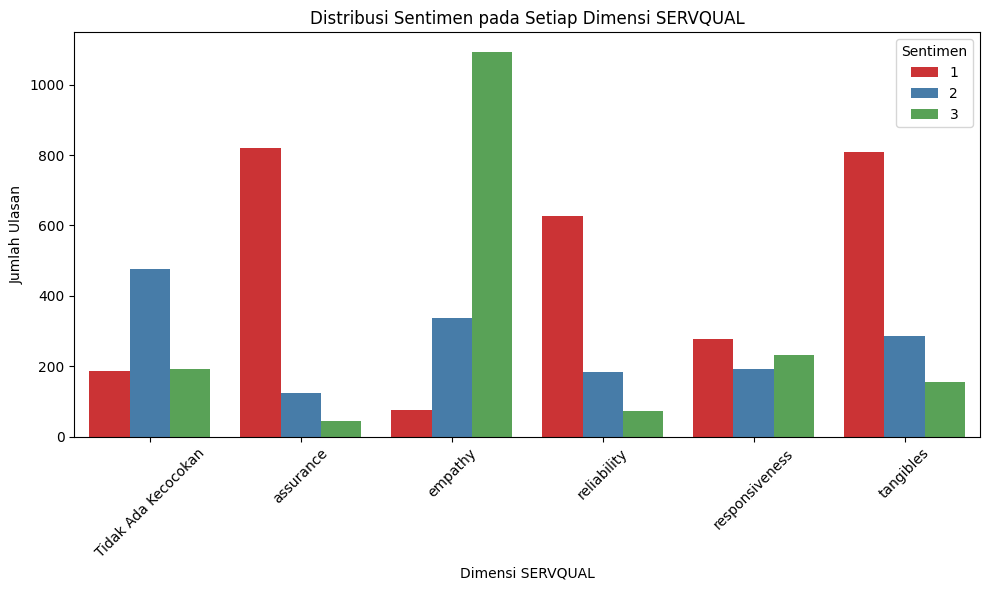

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ubah index ke kolom agar bisa di-*melt* (reshape)
sentimen_df = sentimen_pivot.reset_index().melt(id_vars='servqual_label', var_name='Sentimen', value_name='Jumlah')

# Plot grouped bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=sentimen_df, x='servqual_label', y='Jumlah', hue='Sentimen', palette='Set1')

plt.title("Distribusi Sentimen pada Setiap Dimensi SERVQUAL")
plt.xlabel("Dimensi SERVQUAL")
plt.ylabel("Jumlah Ulasan")
plt.legend(title='Sentimen')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()